In [ ]:
#importing the neccessary libaries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Plotly
import plotly.express as px
import plotly.graph_objects as go
#algorithm to learn from the input and predict the output

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#evaluation metrics 1 for classification
from  sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#reading the original file
data = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

In [ ]:
#Data Assessment

In [ ]:
data.head()

step     type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     8  PAYMENT 29544.78000  C1974038103    18683.31000         0.00000   
1     8  PAYMENT   714.87000  C1174807121        0.00000         0.00000   
2    11  PAYMENT  6113.37000  C1673645214      105.00000         0.00000   
3     9  PAYMENT 11479.38000   C495536427        0.00000         0.00000   
4    10  PAYMENT 15212.69000   C774229990      358.00000         0.00000   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0   M974902176         0.00000         0.00000  0.00000         0.00000  
1  M1942903293         0.00000         0.00000  0.00000         0.00000  
2    M52236598         0.00000         0.00000  0.00000         0.00000  
3   M766609257         0.00000         0.00000  0.00000         0.00000  
4  M1358125351         0.00000         0.00000  0.00000         0.00000

In [ ]:
#checking the data shape(rows and columns)
print("The data: {}".format(data.shape))

In [ ]:
#select 100000 random sample from trainset
df = data.sample(100000, random_state = 42)

In [ ]:
#reset the randomized sample trainset data index to avoid error for future use
sample_train = df.reset_index(drop = True)

In [ ]:
print (sample_train.shape)

(100000, 11)


In [ ]:
#check the percentage of dependent samples of original data
data['isFraud'].value_counts(normalize=True)

0.00000   0.99954
1.00000   0.00046
Name: isFraud, dtype: float64

In [ ]:
#check the percentage of dependent samples of randomised data
df['isFraud'].value_counts(normalize=True)

0.00000   0.99960
1.00000   0.00040
Name: isFraud, dtype: float64

In [ ]:
df.to_csv('projectsamples.csv', index=False)

In [ ]:
df = pd.read_csv('/content/projectsamples.csv')

In [ ]:
#checking fo null value
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  99999 non-null   float64
 9   isFraud         99999 non-null   float64
 10  isFlaggedFraud  99999 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 8.4+ MB


In [ ]:
df.describe()

step         amount  oldbalanceOrg  newbalanceOrig  \
count 100000.00000   100000.00000   100000.00000    100000.00000   
mean       8.66822   175677.31510   895401.00242    911469.89509   
std        1.80590   346880.12418  2778744.02329   2816176.61228   
min        1.00000        0.32000        0.00000         0.00000   
25%        8.00000    10221.28000        0.00000         0.00000   
50%        9.00000    55075.36000    20247.27500         0.00000   
75%       10.00000   213662.91500   199601.57500    225143.02250   
max       11.00000 10000000.00000 38939424.03000  38946233.02000   

       oldbalanceDest  newbalanceDest     isFraud  isFlaggedFraud  
count    100000.00000     99999.00000 99999.00000     99999.00000  
mean     882150.59893   1181157.39541     0.00113         0.00000  
std     2378341.37557   2766153.43561     0.03360         0.00000  
min           0.00000         0.00000     0.00000         0.00000  
25%           0.00000         0.00000     0.00000         0.00000  
50%       22240.95500     59189.08000     0.00000         0.00000  
75%      608286.66250   1081208.14000     0.00000         0.00000  
max    34008736.98000  38946233.02000     1.00000         0.00000

In [ ]:
df.duplicated().any()

False

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            99999 non-null  int64  
 1   type            99999 non-null  object 
 2   amount          99999 non-null  float64
 3   nameOrig        99999 non-null  object 
 4   oldbalanceOrg   99999 non-null  float64
 5   newbalanceOrig  99999 non-null  float64
 6   nameDest        99999 non-null  object 
 7   oldbalanceDest  99999 non-null  float64
 8   newbalanceDest  99999 non-null  float64
 9   isFraud         99999 non-null  float64
 10  isFlaggedFraud  99999 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 9.2+ MB


In [ ]:
# Exploratory Data Analysis

In [ ]:
# Univariate Exploration

In [ ]:
print(df['isFraud'].value_counts())

0.00000    99886
1.00000      113
Name: isFraud, dtype: int64


In [ ]:
#plotting a bar chart distribution of fraudulent and non fraudulent cases
labels = list(df['isFraud'].value_counts().index)
values = list(df['isFraud'].value_counts().values)

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=labels, y=values,
        )])

fig.show()


In [ ]:
print(df['type'].value_counts())

PAYMENT     39146
CASH_OUT    31138
CASH_IN     20205
TRANSFER     8520
DEBIT         990
Name: type, dtype: int64


In [ ]:
# distribution of transaction type
tranx_type = df.type.value_counts()
figure = px.pie(df, values = tranx_type.values, names = tranx_type.index,hole = .5, title = 'Distribution of Transaction Type')
figure.show()

Text(0, 0.5, 'Count')

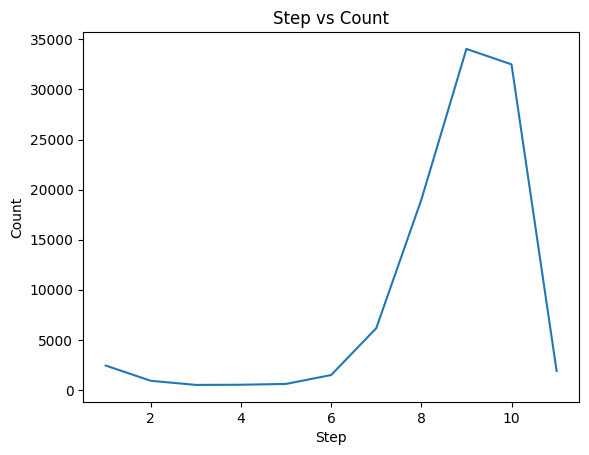

In [ ]:
# Countplot of the 'step' column
plt.title("Step vs Count")
df['step'].value_counts().sort_index().plot(kind='line')
plt.xlabel("Step")
plt.ylabel("Count")

In [ ]:
#boxplot distribution for the feature 'Amount'
fig = px.box(df, x="amount")
fig.show()

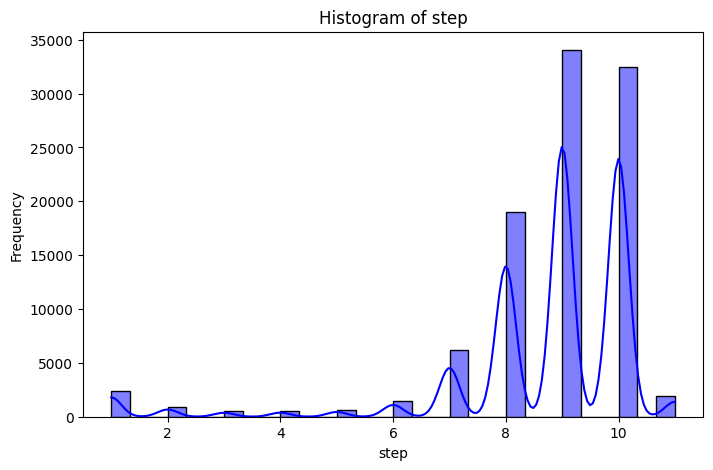

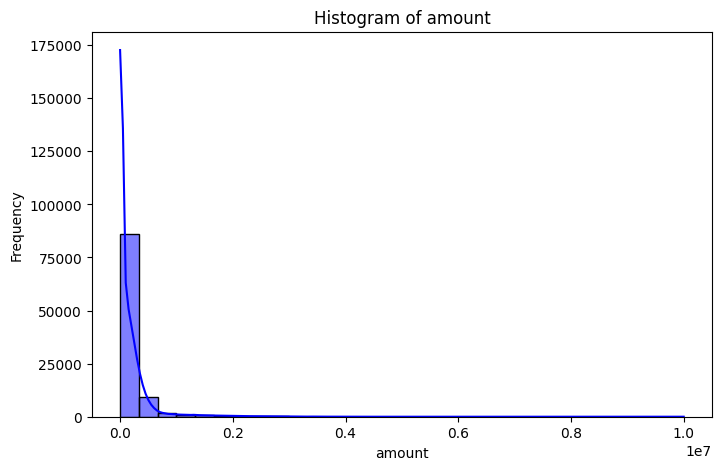

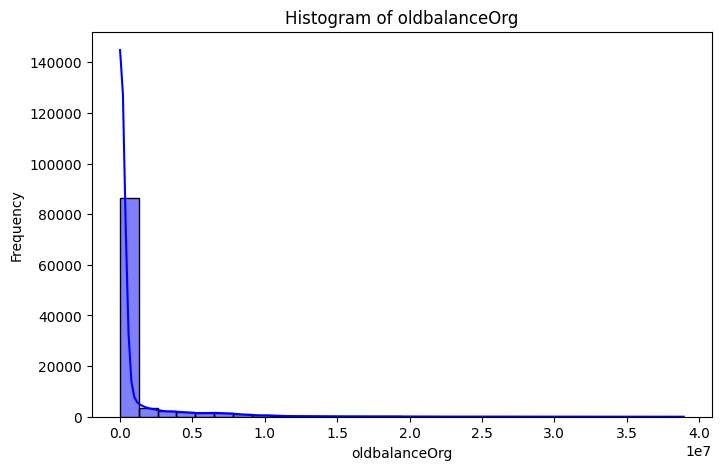

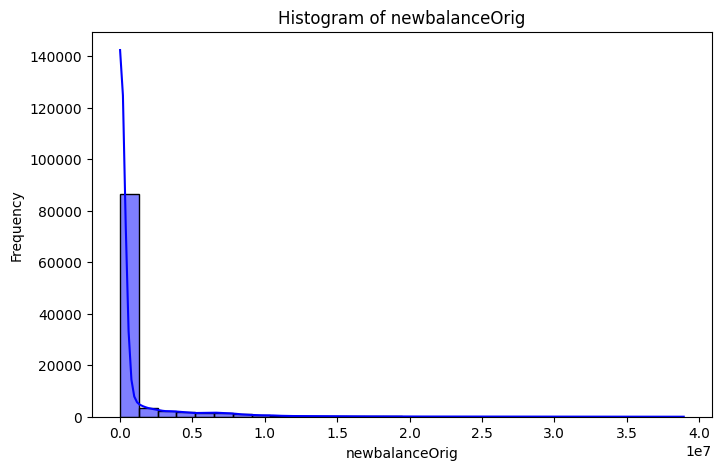

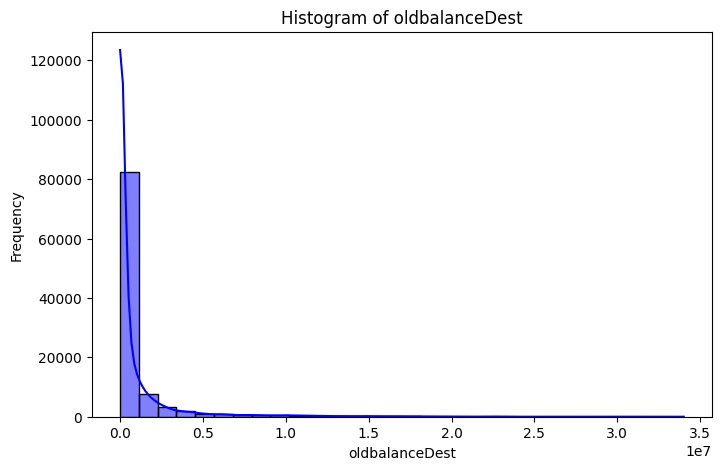

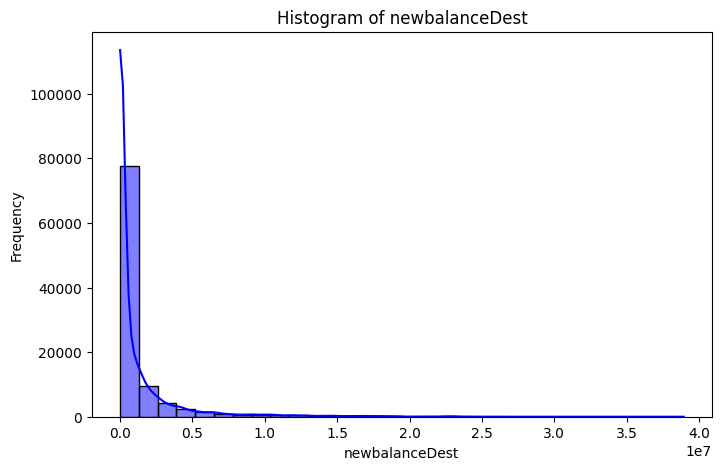

In [ ]:
numerical_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], bins=30, kde=True, color='blue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Biviariate Exploration

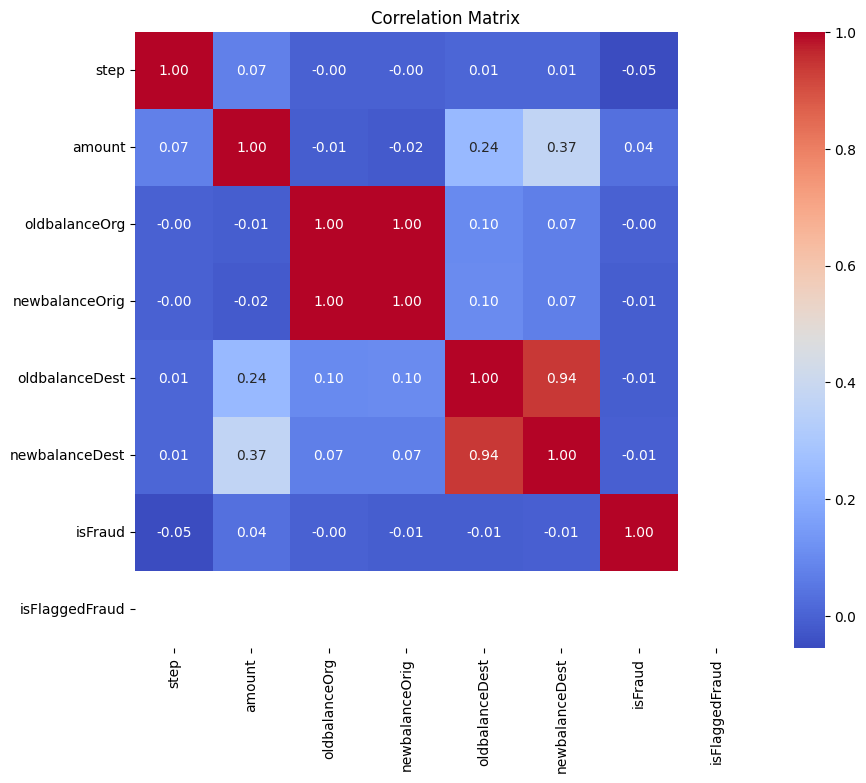

In [ ]:
# Heatmap or Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Text(0.5, 1.0, 'The Sum Distribution of amount in respect to the type ')

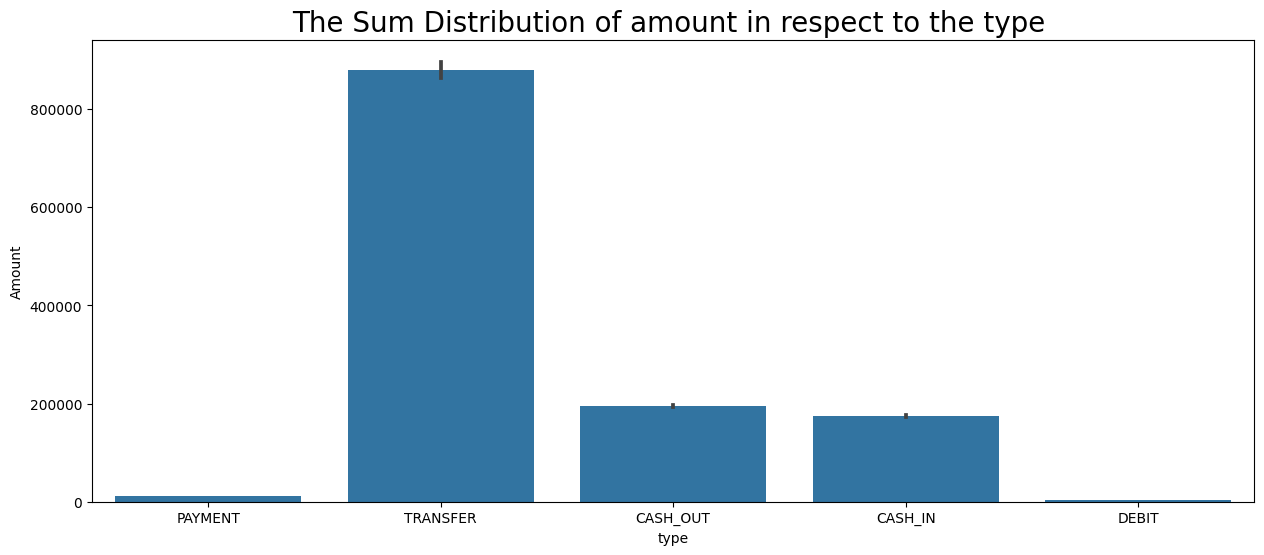

In [ ]:
#Show barchart for the relationship between type and amount
plt.figure(figsize = [15, 6])
color_pal = sns.color_palette()[0]
sns.barplot(data= df, x= 'type', y = 'amount' , color = color_pal)
plt.xlabel("type")
plt.ylabel("Amount")
plt.title("The Sum Distribution of amount in respect to the type ", size =20)

In [ ]:
# check the frequency of fraudulent and non fraudulent case
cross_tab_result=pd.crosstab(index=df.type,columns=df.isFraud)
cross_tab_result

isFraud   0.00000  1.00000
type                      
CASH_IN     20205        0
CASH_OUT    31081       57
DEBIT         990        0
PAYMENT     39146        0
TRANSFER     8464       56

<Axes: xlabel='type'>

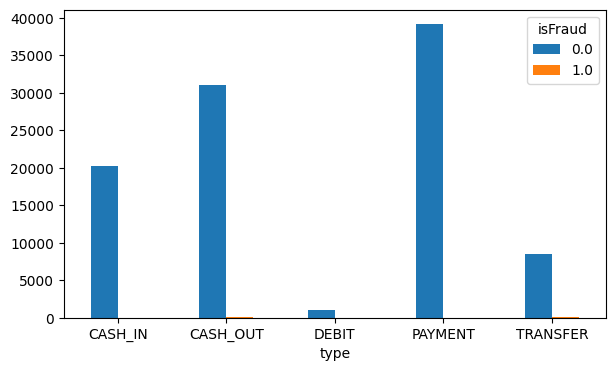

In [ ]:
# bar chart showing the frequency of fraudulent and non fraudulent case
cross_tab_result.plot.bar(figsize=(7,4), rot=0)

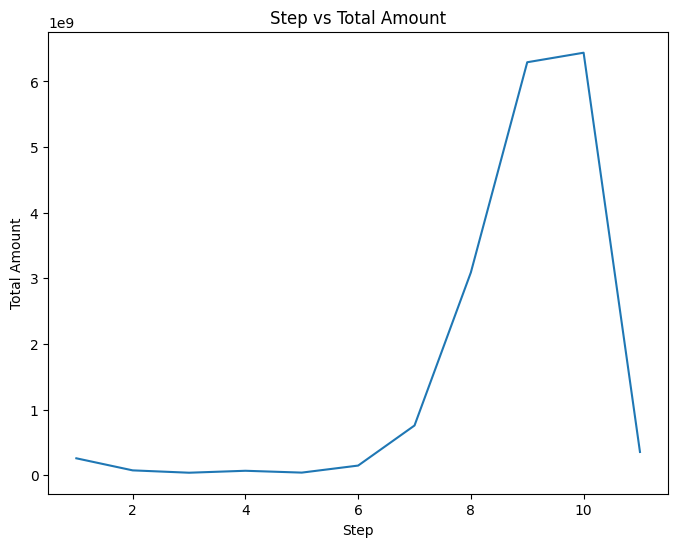

In [ ]:
# Plot step vs amount max and mean
df_step_amount_sum = df[['step', "amount"]].groupby('step').sum()
plt.figure(figsize=(8, 6))
sns.lineplot(df_step_amount_sum, x='step', y='amount')
plt.title('Step vs Total Amount')
plt.xlabel('Step')
plt.ylabel('Total Amount')
plt.show()


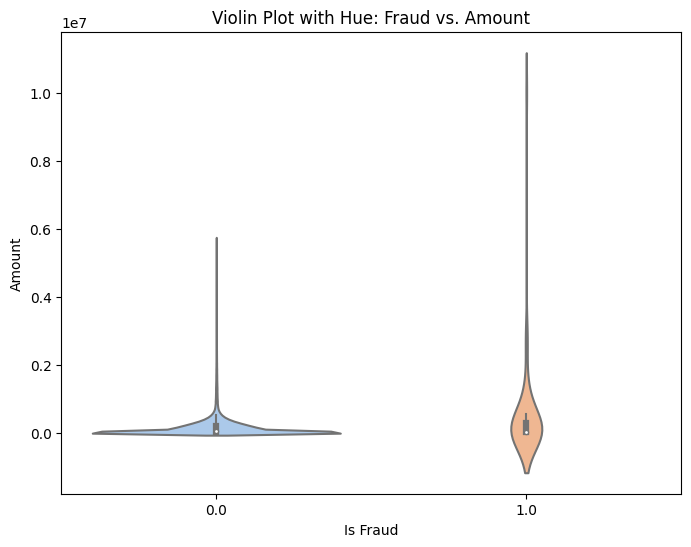

In [ ]:
# Violin Plot with Hue: 'isFraud' vs 'amount'
plt.figure(figsize=(8, 6))
sns.violinplot(x='isFraud', y='amount', data=df, palette='pastel')
plt.title('Violin Plot with Hue: Fraud vs. Amount')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.show()

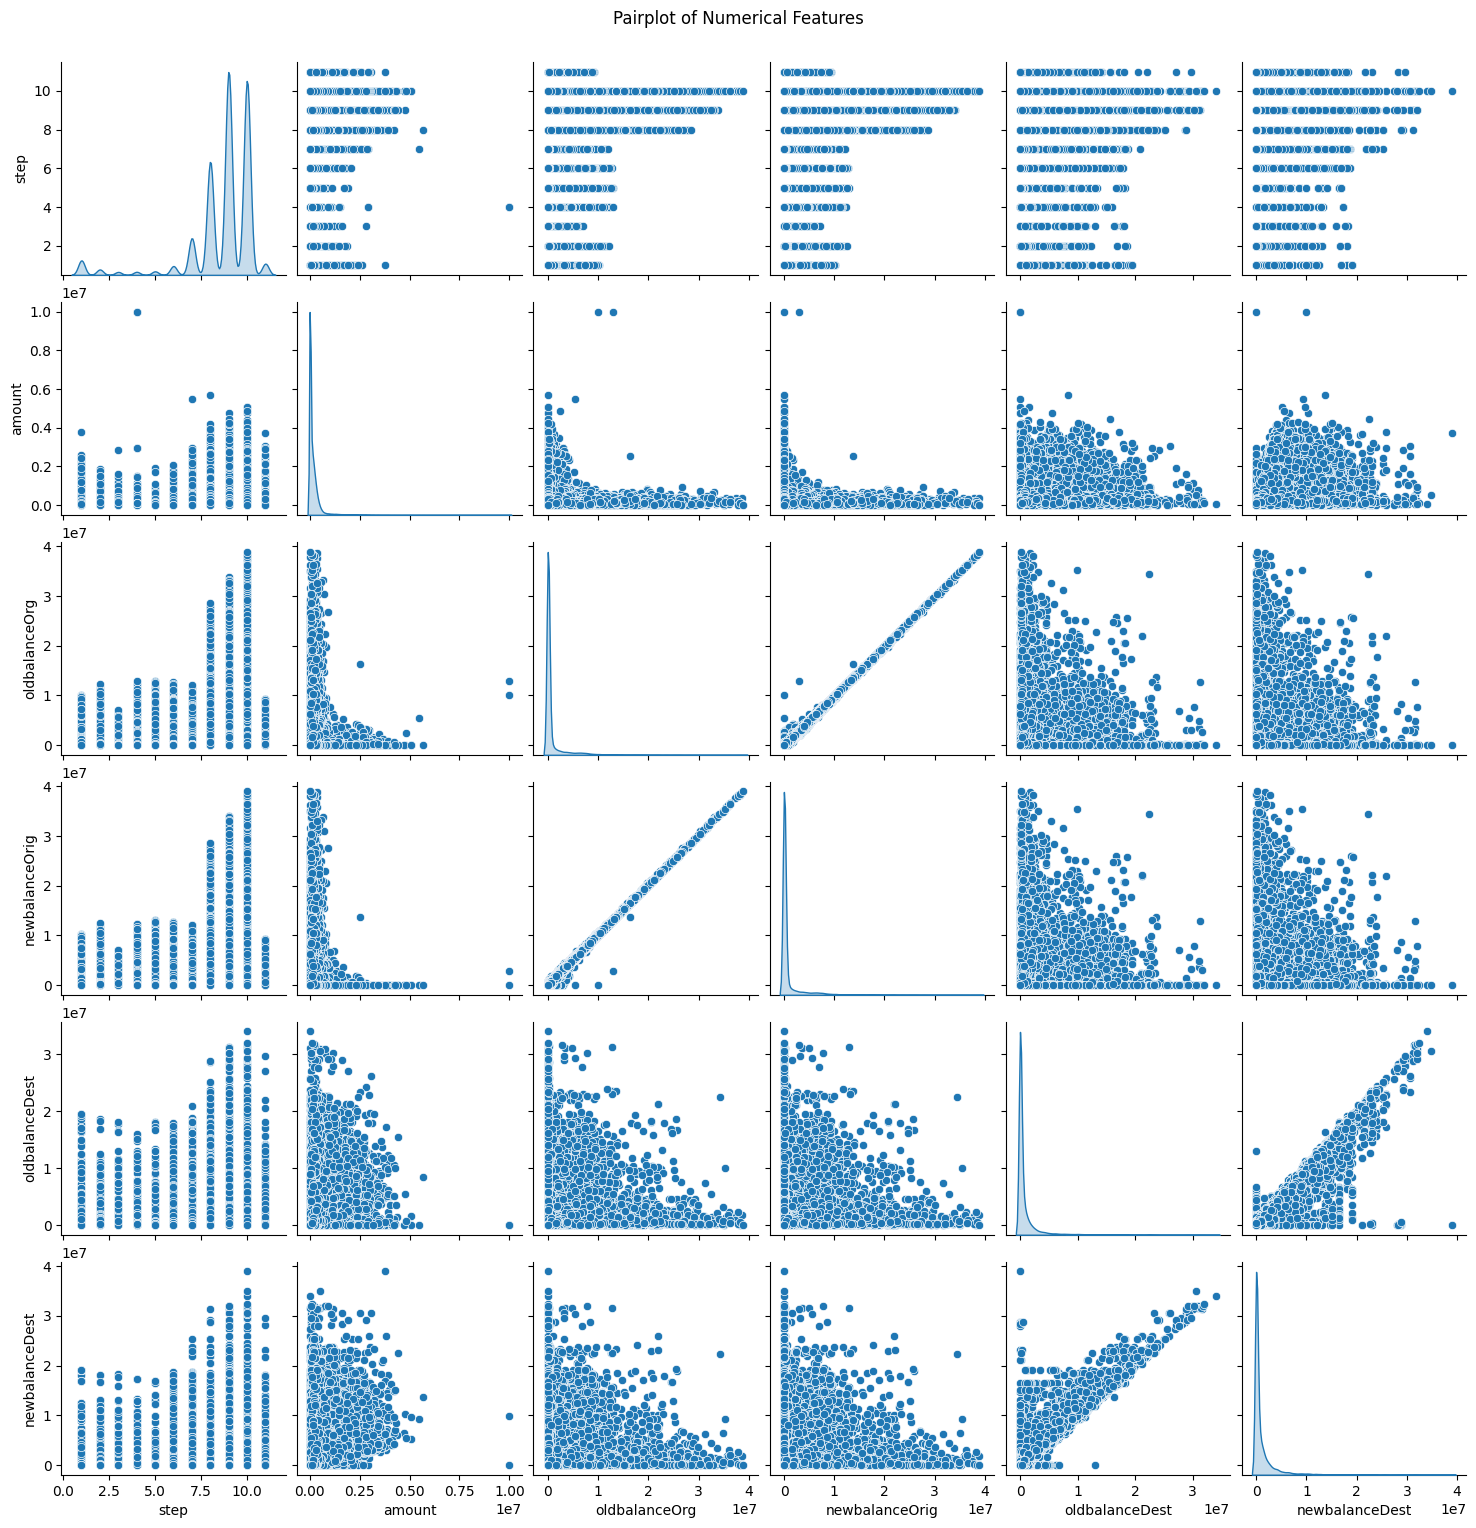

In [ ]:
# Pairplot showing the relationship between the numerical variables
sns.pairplot(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


In [ ]:
# Multivariate analysis

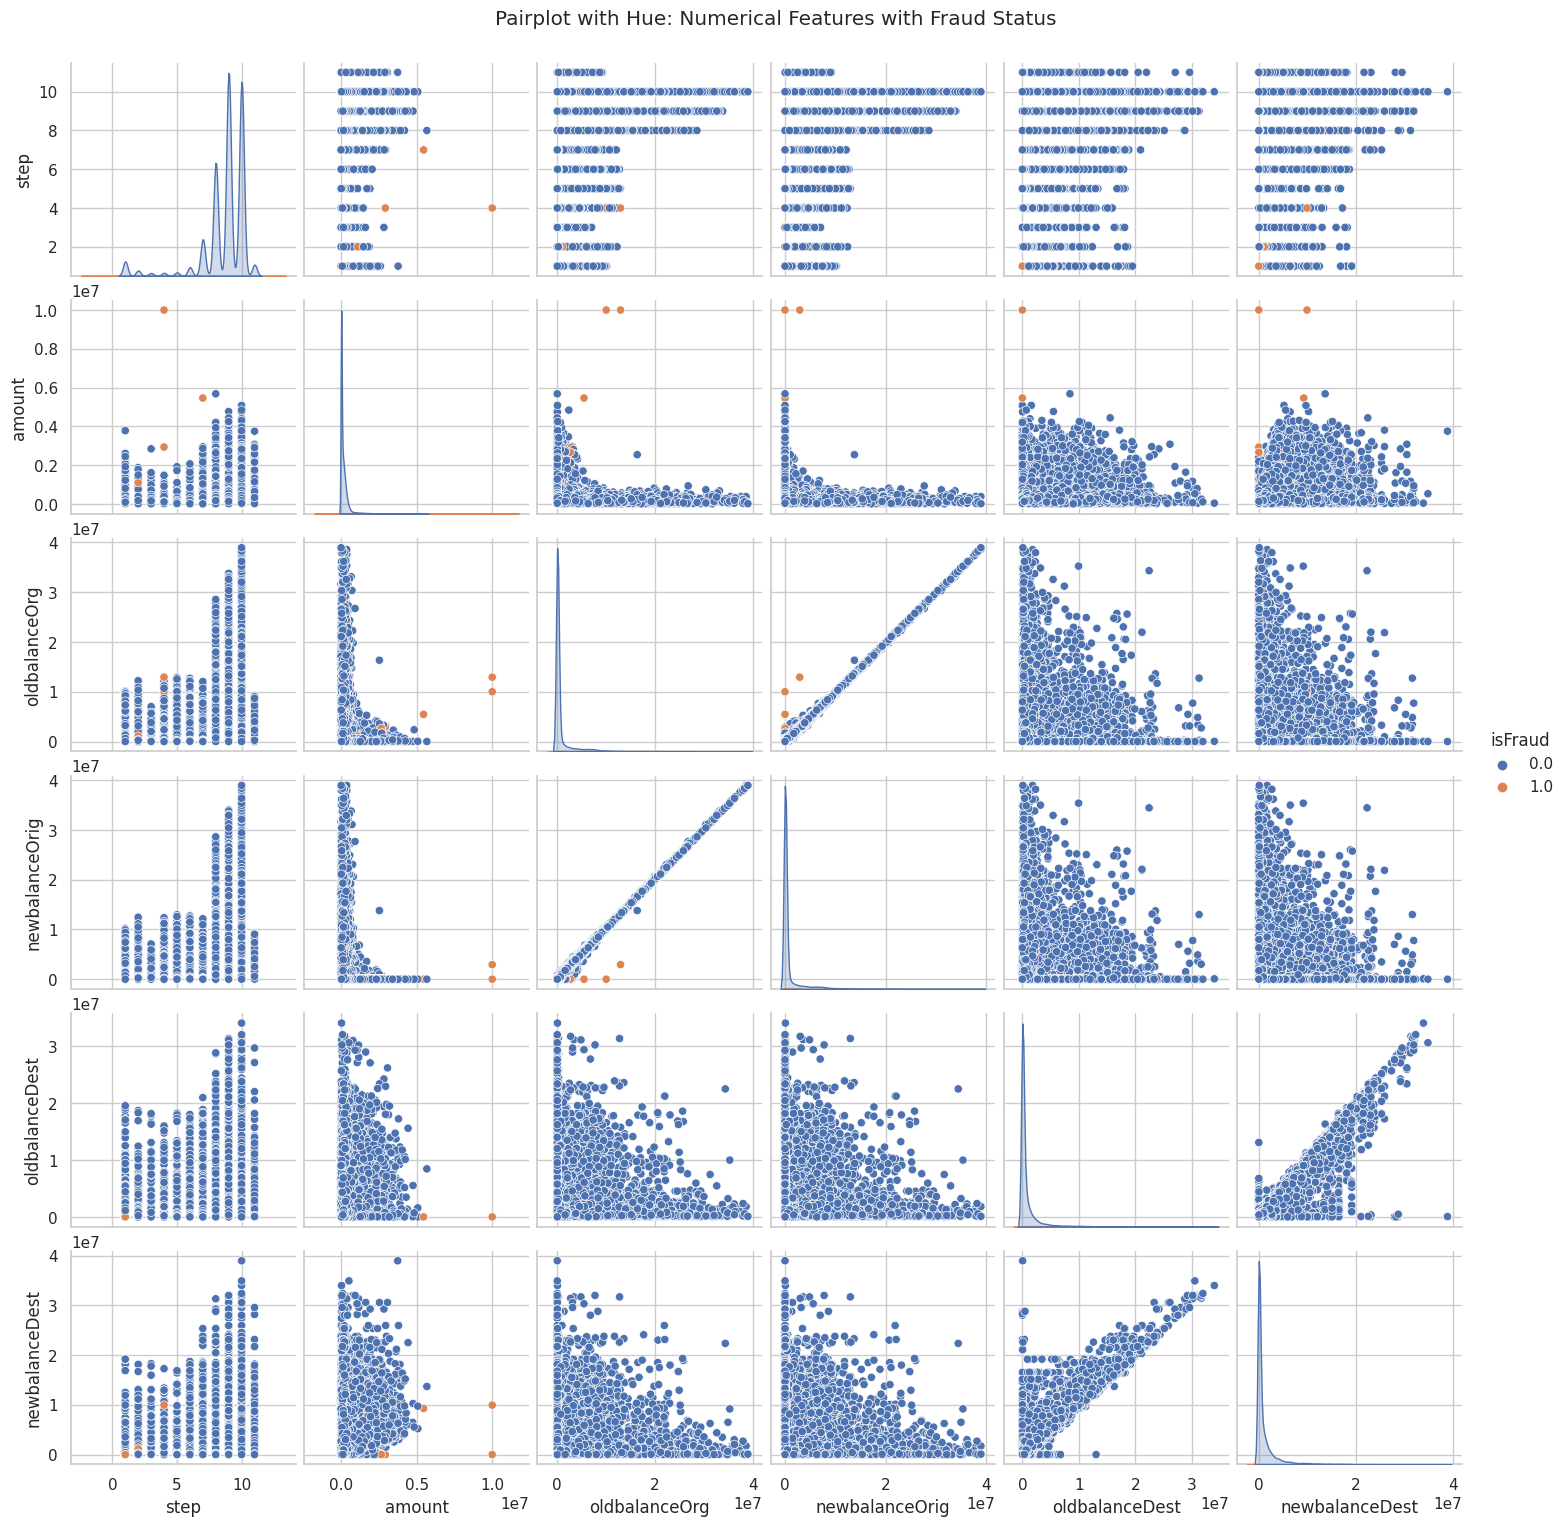

In [ ]:
# Pairplot showing the relationship between the numerical variables with hue: isfraud
sns.set(style="whitegrid")
# Pairplot with Hue: Multivariate relationships among numerical features with 'isFraud' as hue
sns.pairplot(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']], hue='isFraud')
plt.suptitle('Pairplot with Hue: Numerical Features with Fraud Status', y=1.02)
plt.show()

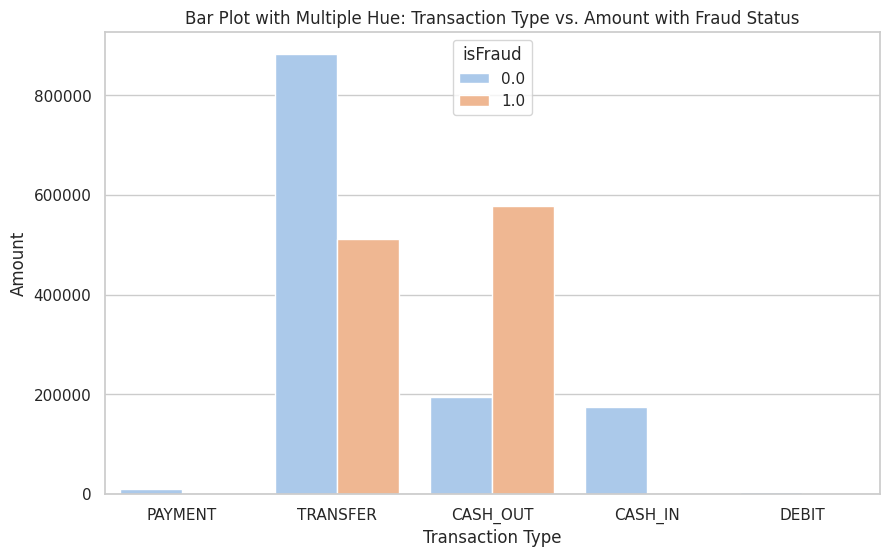

In [ ]:
# the type distribution against amount with Hue: isFraud
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='amount', hue='isFraud', data=df, palette='pastel', ci=None)
plt.title('Bar Plot with Multiple Hue: Transaction Type vs. Amount with Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.show()

In [ ]:
# Feature Engineerng

In [ ]:
df = pd.read_csv('/content/projectsamples.csv')
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            99999 non-null  int64  
 1   type            99999 non-null  object 
 2   amount          99999 non-null  float64
 3   nameOrig        99999 non-null  object 
 4   oldbalanceOrg   99999 non-null  float64
 5   newbalanceOrig  99999 non-null  float64
 6   nameDest        99999 non-null  object 
 7   oldbalanceDest  99999 non-null  float64
 8   newbalanceDest  99999 non-null  float64
 9   isFraud         99999 non-null  float64
 10  isFlaggedFraud  99999 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 9.2+ MB


In [ ]:
# creating transaction Time Features from the feature 'step'
df['hour_of_day'] = df['step'] % 24
df['day_of_week'] = (df['step'] // 24) % 7

In [ ]:
# creating transaction amount ratios feature
df['amount_to_oldbalanceOrg'] = df['amount'] / (df['oldbalanceOrg'] + 1)  # Add 1 to avoid division by zero
df['amount_to_oldbalanceDest'] = df['amount'] / (df['oldbalanceDest'] + 1)

In [ ]:
# creating Transaction Frequency
transaction_counts = df['nameOrig'].append(df['nameDest']).value_counts()
df['originator_transaction_freq'] = df['nameOrig'].map(transaction_counts)
df['recipient_transaction_freq'] = df['nameDest'].map(transaction_counts)


In [ ]:
#creating Balance Change Features
df['orig_balance_change'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['dest_balance_change'] = df['newbalanceDest'] - df['oldbalanceDest']


In [ ]:
df.head()

step      type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT  9839.64000  C1231006815   170136.00000    160296.36000   
1     1   PAYMENT  1864.28000  C1666544295    21249.00000     19384.72000   
2     1  TRANSFER   181.00000  C1305486145      181.00000         0.00000   
3     1  CASH_OUT   181.00000   C840083671      181.00000         0.00000   
4     1   PAYMENT 11668.14000  C2048537720    41554.00000     29885.86000   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0  M1979787155         0.00000         0.00000  0.00000         0.00000   
1  M2044282225         0.00000         0.00000  0.00000         0.00000   
2   C553264065         0.00000         0.00000  1.00000         0.00000   
3    C38997010     21182.00000         0.00000  1.00000         0.00000   
4  M1230701703         0.00000         0.00000  0.00000         0.00000   

   hour_of_day  day_of_week  amount_to_oldbalanceOrg  \
0            1            0                  0.05783   
1            1            0                  0.08773   
2            1            0                  0.99451   
3            1            0                  0.99451   
4            1            0                  0.28079   

   amount_to_oldbalanceDest  originator_transaction_freq  \
0                9839.64000                            1   
1                1864.28000                            1   
2                 181.00000                            1   
3                   0.00854                            1   
4               11668.14000                            1   

   recipient_transaction_freq  orig_balance_change  dest_balance_change  
0                           1           9839.64000              0.00000  
1                           1           1864.28000              0.00000  
2                           3            181.00000              0.00000  
3                           1            181.00000         -21182.00000  
4                           1          11668.14000              0.00000

In [ ]:
# we can create new bar chart from the newly created features

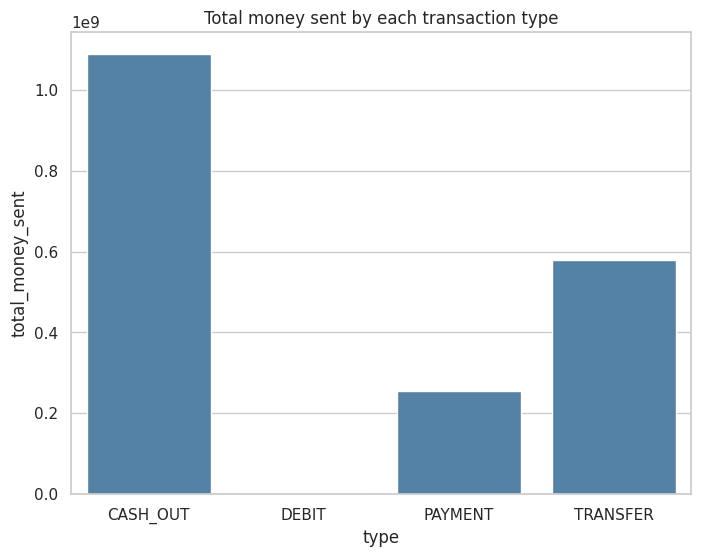

In [ ]:
#creating the type distribution against the total money sent while excluding CASH_IN transaction type
no_cash_in = df[df['type']!='CASH_IN']
total_sent_by_trans_type = no_cash_in.groupby('type')['orig_balance_change'].sum().reset_index(name='total_money_sent')
fig = plt.figure(figsize=(8,6))
sns.barplot(x='type', y='total_money_sent', data=total_sent_by_trans_type, color='steelblue')
plt.title('Total money sent by each transaction type')
plt.show(fig)

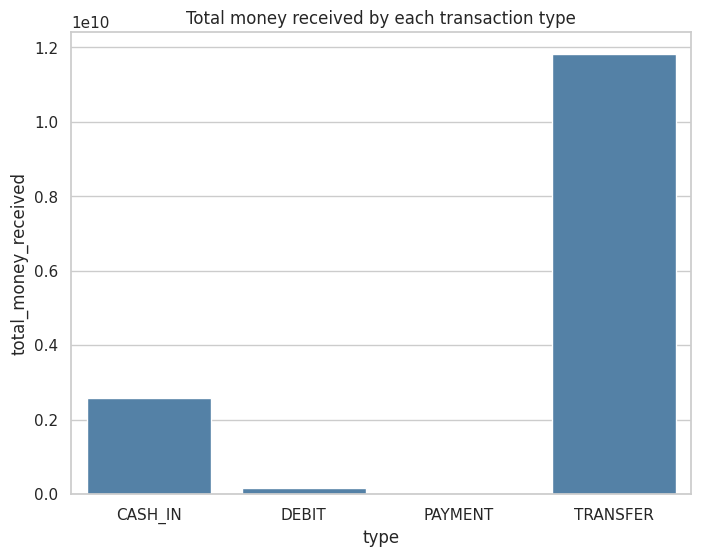

In [ ]:
##creating the type distribution against the total money received while excluding CASH_OUT transaction type
no_cash_out = df[df['type']!='CASH_OUT']
total_received_by_trans_type = no_cash_out.groupby('type')['dest_balance_change'].sum().reset_index(name='total_money_received')
fig = plt.figure(figsize=(8,6))
sns.barplot(x='type', y='total_money_received', data=total_received_by_trans_type, color='steelblue')
plt.title('Total money received by each transaction type')
plt.show(fig)

In [ ]:
df['orig_balance_change'] = df['orig_balance_change'].abs()
df['dest_balance_change'] = df['dest_balance_change'].abs()

In [ ]:
df.info()

In [ ]:
# Transaction Type Encoding
from sklearn.preprocessing import LabelEncoder, RobustScaler
labelencoder = LabelEncoder()
df['type'] = labelencoder.fit_transform(df['type'])


In [ ]:
# Drop unnecessary columns
df.drop(['step', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)


In [ ]:
# Display the DataFrame with new features
df.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'hour_of_day', 'day_of_week',
       'amount_to_oldbalanceOrg', 'amount_to_oldbalanceDest',
       'originator_transaction_freq', 'recipient_transaction_freq',
       'orig_balance_change', 'dest_balance_change'],
      dtype='object')

In [ ]:
columns = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest','isFraud', 'hour_of_day', 'day_of_week',
       'amount_to_oldbalanceOrg', 'amount_to_oldbalanceDest',
       'originator_transaction_freq', 'recipient_transaction_freq',
       'orig_balance_change', 'dest_balance_change'
       ]

In [ ]:
# Modelling

In [ ]:
# We are using RobustScaler to scale down the numerical features as RobustScaler is less prone to outliers
scale=RobustScaler()
for feature in columns:
    df[feature]=scale.fit_transform(df[feature].values.reshape(-1, 1))
df.head()

type   amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0 1.00000 -0.12549       -0.00784         0.00000        -0.03656   
1 1.00000 -0.26720       -0.10144         0.00000        -0.03656   
2 1.00000 -0.24066       -0.10091         0.00000        -0.03656   
3 1.00000 -0.21429       -0.10144         0.00000        -0.03656   
4 1.00000 -0.19594       -0.09965         0.00000        -0.03656   

   newbalanceDest  isFraud  hour_of_day  day_of_week  amount_to_oldbalanceOrg  \
0        -0.05474  0.00000     -0.50000      0.00000                 -0.00017   
1        -0.05474  0.00000     -0.50000      0.00000                  0.07696   
2        -0.05474  0.00000      1.00000      0.00000                  0.00589   
3        -0.05474  0.00000      0.00000      0.00000                  1.24096   
4        -0.05474  0.00000      0.50000      0.00000                  0.00424   

   amount_to_oldbalanceDest  originator_transaction_freq  \
0                   3.25054                      0.00000   
1                   0.07789                      0.00000   
2                   0.67198                      0.00000   
3                   1.26250                      0.00000   
4                   1.67334                      0.00000   

   recipient_transaction_freq  orig_balance_change  dest_balance_change  
0                    -0.25000              0.26214             -0.15488  
1                    -0.25000             -0.14906             -0.15488  
2                    -0.25000             -0.14675             -0.15488  
3                    -0.25000             -0.14906             -0.15488  
4                    -0.25000             -0.14118             -0.15488

In [ ]:
x = df.drop("isFraud", axis=1)
y = df[["isFraud"]]


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

In [ ]:
#  Applying feature selection methods

In [ ]:
# SelectKbest feature selection

In [ ]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif


def featureSelect_dataframe(x, y, criteria):
    # Initialize SelectKBest with the specified criteria
    reg = SelectKBest(criteria).fit(x, y)

    # Get the feature scores
    feature_scores = reg.scores_

    # Create a DataFrame to store feature names and their corresponding scores
    feature_scores_df = pd.DataFrame({'Feature': x.columns, 'Score': feature_scores})

    # Sort the DataFrame by scores in descending order
    sorted_features_df = feature_scores_df.sort_values(by='Score', ascending=False)

    # Extract the names of selected features
    selected_feature_names = sorted_features_df['Feature'].tolist()

    # Filter down X based on kept columns
    X = x[selected_feature_names]

    # Return the dataframe with selected features
    return X, sorted_features_df

# Example usage
feature_scores_table = featureSelect_dataframe(x_train, y_train, criteria=f_classif)
print(feature_scores_table)


(       orig_balance_change  amount_to_oldbalanceDest  hour_of_day   amount  \
67299              0.42469                   2.86801      0.50000 -0.14258   
61368              1.20766                  -0.00076      0.00000  5.09926   
84584             -0.14906                  -0.00068      0.50000  0.94269   
241               -0.06457                   0.61789      0.50000 -0.24308   
27616              0.80881                  -0.00061      0.00000 -0.05679   
...                    ...                       ...          ...      ...   
41396              7.90905                  -0.00057      0.50000  1.52890   
51407             -0.03673                   0.56090      0.00000 -0.24562   
93274              0.26688                   2.07895      0.00000 -0.17782   
43959             -0.14906                   0.22315      0.00000 -0.26071   
76325              0.36426                   2.56586      0.50000 -0.15607   

          type  oldbalanceDest  newbalanceOrig  newbalanceDest

In [ ]:
def featureSelect_dataframe(x, y, criteria, k):

    # initialize our function/method
    reg = SelectKBest(criteria, k=k).fit(x,y)

    # transform after creating the reg (so we can use getsupport)
    X_transformed = reg.transform(x)

    # filter down X based on kept columns
    X = x[[val for i,val in enumerate(x.columns) if reg.get_support()[i]]]

    # return that dataframe
    return X

In [ ]:
New_X = featureSelect_dataframe(x, y, f_classif, 12)

New_X

type   amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0      1.00000 -0.12549       -0.00784         0.00000        -0.03656   
1      1.00000 -0.26720       -0.10144         0.00000        -0.03656   
2      1.00000 -0.24066       -0.10091         0.00000        -0.03656   
3      1.00000 -0.21429       -0.10144         0.00000        -0.03656   
4      1.00000 -0.19594       -0.09965         0.00000        -0.03656   
...        ...      ...            ...             ...             ...   
99995  1.00000 -0.24220       -0.10144         0.00000        -0.03656   
99996  0.00000  1.18644       -0.10144         0.00000         4.41542   
99997  0.00000  0.54318        3.04014         2.04969         1.02031   
99998  1.00000 -0.10562       -0.04688         0.00000        -0.03656   
99999 -0.50000  0.36206        7.98726         7.74270         0.53082   

       newbalanceDest  hour_of_day  amount_to_oldbalanceOrg  \
0            -0.05474     -0.50000                 -0.00017   
1            -0.05474     -0.50000                  0.07696   
2            -0.05474      1.00000                  0.00589   
3            -0.05474      0.00000                  1.24096   
4            -0.05474      0.50000                  0.00424   
...               ...          ...                      ...   
99995        -0.05474      0.00000                  0.62697   
99996         2.72393      0.50000                 32.05590   
99997         0.80035      0.50000                 -0.00031   
99998        -0.05474      0.50000                 -0.00001   
99999        -0.03493      0.00000                 -0.00033   

       amount_to_oldbalanceDest  recipient_transaction_freq  \
0                       3.25054                    -0.25000   
1                       0.07789                    -0.25000   
2                       0.67198                    -0.25000   
3                       1.26250                    -0.25000   
4                       1.67334                    -0.25000   
...                         ...                         ...   
99995                   0.63763                    -0.25000   
99996                  -0.00077                     1.37500   
99997                  -0.00075                     0.25000   
99998                   3.69546                    -0.25000   
99999                  -0.00074                     0.75000   

       orig_balance_change  dest_balance_change  
0                  0.26214             -0.15488  
1                 -0.14906             -0.15488  
2                 -0.14675             -0.15488  
3                 -0.14906             -0.15488  
4                 -0.14118             -0.15488  
...                    ...                  ...  
99995             -0.14906             -0.15488  
99996             -0.14906              0.70020  
99997              3.49530              0.65767  
99998              0.09061             -0.15488  
99999              2.68429              0.77875  

[99999 rows x 12 columns]

In [ ]:
x_train , x_test , y_train, y_test = train_test_split(New_X, y,test_size=0.20, random_state=42, stratify=y)

In [ ]:
# recursive feature elimination

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
lr = LogisticRegression(random_state=42)
rfecv = RFECV(estimator=lr, cv=StratifiedKFold(10, random_state=42, shuffle=True), scoring="accuracy")
rfecv.fit(x, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
      estimator=LogisticRegression(random_state=42), scoring='accuracy')

In [ ]:
# Get the feature rankings
feature_ranking = rfecv.ranking_

# Print the feature rankings
print("Feature Rankings:", feature_ranking)
print("No. of significant features: ", rfecv.n_features_)

Feature Rankings: [6 1 1 1 1 2 1 8 4 5 7 1 1 3]
No. of significant features:  7


In [ ]:
#creating a table of selected by rfe feature selection
rfecv_top_7 = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'hour_of_day',
       'recipient_transaction_freq','orig_balance_change'
               ]

x_new = df.loc[:, rfecv_top_7]
x_new.head()

amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  hour_of_day  \
0 -0.12549       -0.00784         0.00000        -0.03656     -0.50000   
1 -0.26720       -0.10144         0.00000        -0.03656     -0.50000   
2 -0.24066       -0.10091         0.00000        -0.03656      1.00000   
3 -0.21429       -0.10144         0.00000        -0.03656      0.00000   
4 -0.19594       -0.09965         0.00000        -0.03656      0.50000   

   recipient_transaction_freq  orig_balance_change  
0                    -0.25000              0.26214  
1                    -0.25000             -0.14906  
2                    -0.25000             -0.14675  
3                    -0.25000             -0.14906  
4                    -0.25000             -0.14118

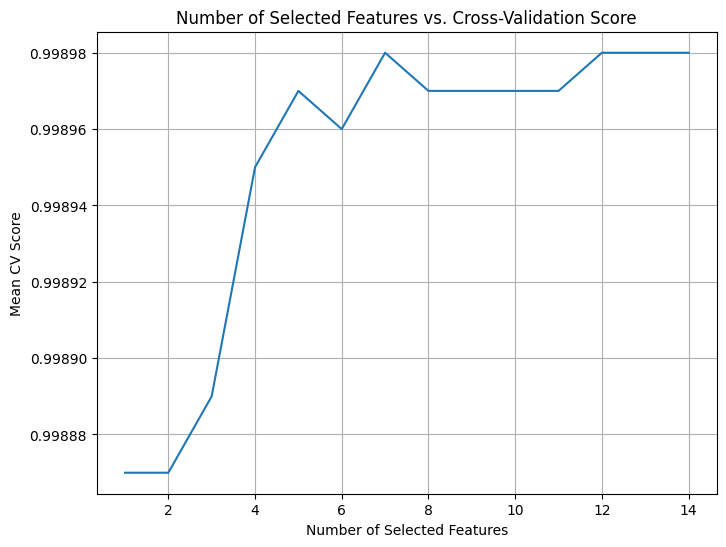

The optimal number of features: 7


In [ ]:
# plotting the number of feature against the cross validation score
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score'])+1), rfecv.cv_results_['mean_test_score'])
plt.grid()
plt.xlabel("Number of Selected Features")
plt.ylabel("Mean CV Score")
plt.title("Number of Selected Features vs. Cross-Validation Score")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

In [ ]:
# train_test_split(X,
x_train , x_test , y_train, y_test = train_test_split(x_new, y,test_size=0.20, random_state=42, stratify=y)

In [ ]:
#  Buruto feature selection

In [ ]:
pip install boruta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.6 MB/s eta 0:00:00


In [ ]:
from boruta import BorutaPy
rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(x), np.array(y))


print("Ranking: ",boruta_selector.ranking_)
print("No. of significant features: ", boruta_selector.n_features_)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	12
Tentative: 	0
Rejected: 	2


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	12
Tentative: 	0
Rejected: 	2
Ranking:  [1 1 1 1 1 1 1 2 1 1 2 1 1 1]
No. of significant features:  12


In [ ]:
#creating a table of selected by boruta feature selection
boruta_top_12 = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'hour_of_day',
       'amount_to_oldbalanceOrg', 'amount_to_oldbalanceDest', 'recipient_transaction_freq',
       'orig_balance_change', 'dest_balance_change'
               ]

X_new = df.loc[:, boruta_top_12]
X_new.head()

type   amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0 1.00000 -0.12549       -0.00784         0.00000        -0.03656   
1 1.00000 -0.26720       -0.10144         0.00000        -0.03656   
2 1.00000 -0.24066       -0.10091         0.00000        -0.03656   
3 1.00000 -0.21429       -0.10144         0.00000        -0.03656   
4 1.00000 -0.19594       -0.09965         0.00000        -0.03656   

   newbalanceDest  hour_of_day  amount_to_oldbalanceOrg  \
0        -0.05474     -0.50000                 -0.00017   
1        -0.05474     -0.50000                  0.07696   
2        -0.05474      1.00000                  0.00589   
3        -0.05474      0.00000                  1.24096   
4        -0.05474      0.50000                  0.00424   

   amount_to_oldbalanceDest  recipient_transaction_freq  orig_balance_change  \
0                   3.25054                    -0.25000              0.26214   
1                   0.07789                    -0.25000             -0.14906   
2                   0.67198                    -0.25000             -0.14675   
3                   1.26250                    -0.25000             -0.14906   
4                   1.67334                    -0.25000             -0.14118   

   dest_balance_change  
0             -0.15488  
1             -0.15488  
2             -0.15488  
3             -0.15488  
4             -0.15488

In [ ]:
x_train , x_test , y_train, y_test = train_test_split(X_new, y,test_size=0.20, random_state=42, stratify=y)

In [ ]:
# Modelling

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, mean_squared_error, mean_absolute_error

def evaluate_model():
    prediction = model.predict(x_test)
    acc_score = accuracy_score(y_test, prediction)
    print('we have {:.2f}% accuracy'.format(acc_score * 100))
    # Plot predicted vs actual
    plt.figure(figsize=(4, 4))
    print(classification_report(y_test,prediction))
    plt.title('Confusion Matrix of the model')
    sns.heatmap(confusion_matrix(y_test,prediction), annot=True, fmt='.5g');

def plot_ROC_curve(y_test, prob):
    # Takes actual and predicted probabilities as input and plots the ROC curve
    fpr, tpr, threshold = roc_curve(y_test, prob)
    auc_value = roc_auc_score(y_test, prob)  # Calculate AUC value

    plt.title("ROC curve plot")
    plt.plot(fpr, tpr, 'b', label="ROC curve (AUC = {:.2f})".format(auc_value))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()


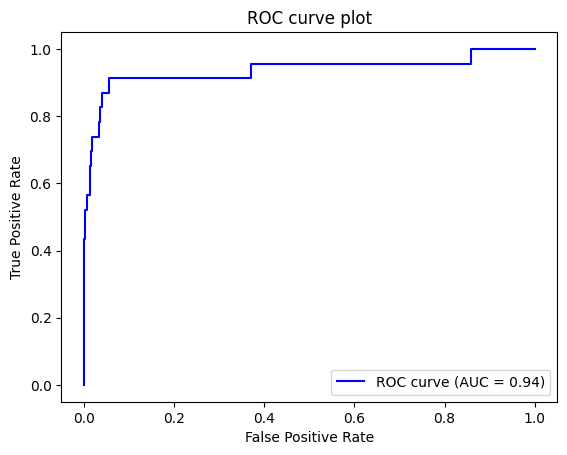

we have 99.89% accuracy
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19977
         1.0       0.67      0.17      0.28        23

    accuracy                           1.00     20000
   macro avg       0.83      0.59      0.64     20000
weighted avg       1.00      1.00      1.00     20000



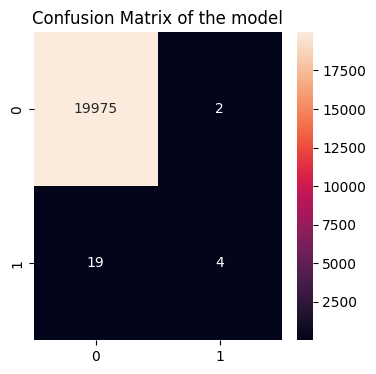

In [ ]:
# evaluation without prior feature selection
model = LogisticRegression(random_state=42)
model.fit(x_train, np.ravel(y_train))
predec_prob = model.predict_proba(x_test)[:,1]
prediction = model.predict(x_test)
LR = accuracy_score(y_test, prediction)
plot_ROC_curve(y_test, predec_prob)
evaluate_model()

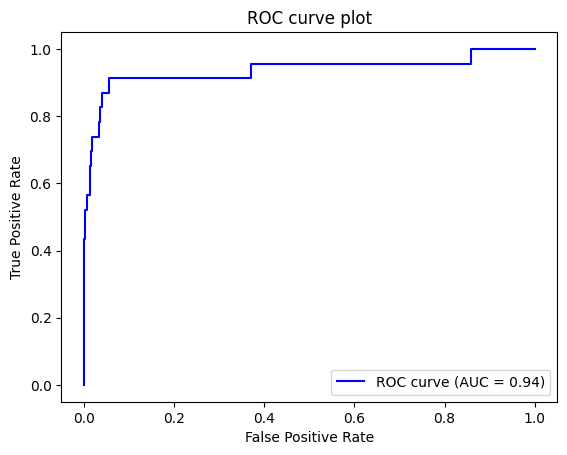

we have 99.89% accuracy
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19977
         1.0       0.67      0.17      0.28        23

    accuracy                           1.00     20000
   macro avg       0.83      0.59      0.64     20000
weighted avg       1.00      1.00      1.00     20000



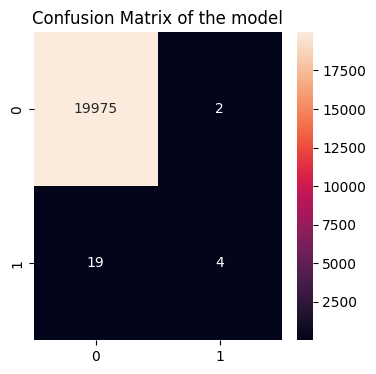

In [ ]:
# selectkbest evaluation with logistic regression
model = LogisticRegression(random_state=42)
model.fit(x_train, np.ravel(y_train))
predec_prob = model.predict_proba(x_test)[:,1]
prediction = model.predict(x_test)
LR = accuracy_score(y_test, prediction)
plot_ROC_curve(y_test, predec_prob)
evaluate_model()

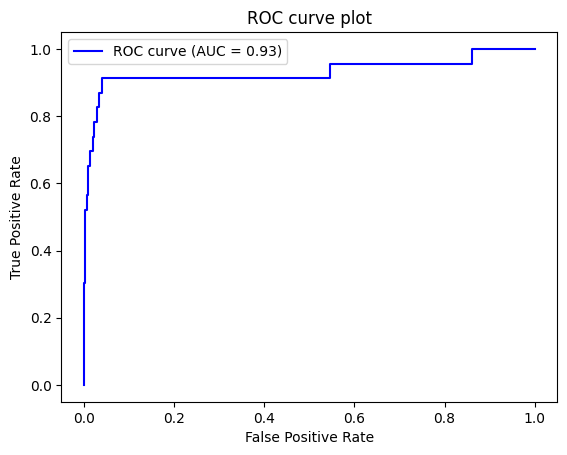

we have 99.89% accuracy
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19977
         1.0       0.67      0.17      0.28        23

    accuracy                           1.00     20000
   macro avg       0.83      0.59      0.64     20000
weighted avg       1.00      1.00      1.00     20000



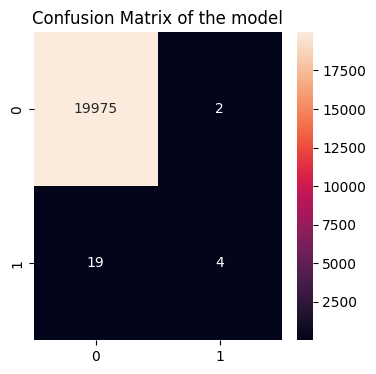

In [ ]:
# rfecv evaluation  with logistic regression
model = LogisticRegression(random_state=42)
model.fit(x_train, np.ravel(y_train))
predec_prob = model.predict_proba(x_test)[:,1]
prediction = model.predict(x_test)
LR = accuracy_score(y_test, prediction)
plot_ROC_curve(y_test, predec_prob)
evaluate_model()

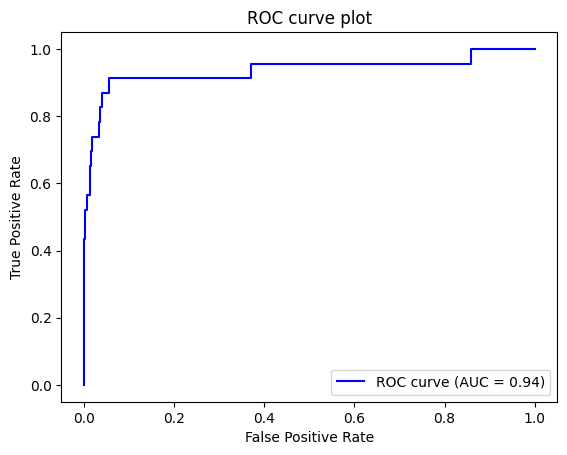

we have 99.89% accuracy
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19977
         1.0       0.67      0.17      0.28        23

    accuracy                           1.00     20000
   macro avg       0.83      0.59      0.64     20000
weighted avg       1.00      1.00      1.00     20000



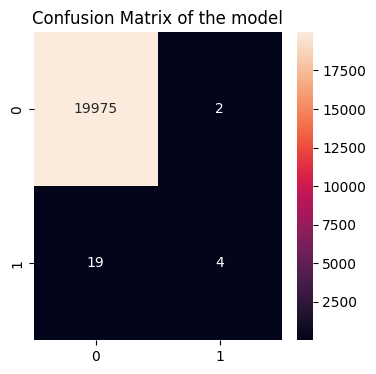

In [ ]:
# boruta evaluation  with logistic regression
model = LogisticRegression(random_state=42)
model.fit(x_train, np.ravel(y_train))

# predections = model.predict(x_test)
predec_prob = model.predict_proba(x_test)[:,1]
prediction = model.predict(x_test)
LR = accuracy_score(y_test, prediction)
# model_evaluation(y_test, predections)
plot_ROC_curve(y_test, predec_prob)
evaluate_model()

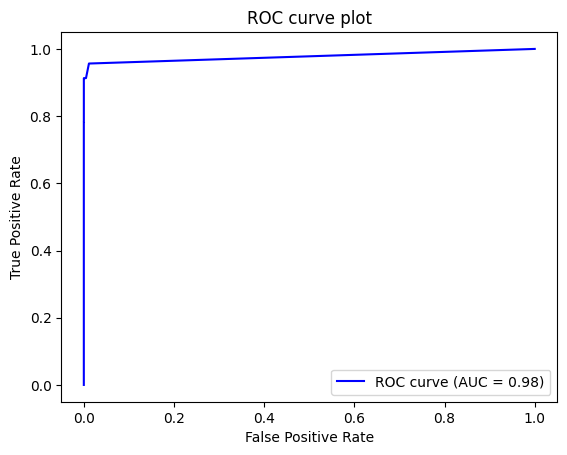

we have 99.98% accuracy
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19977
         1.0       0.95      0.91      0.93        23

    accuracy                           1.00     20000
   macro avg       0.98      0.96      0.97     20000
weighted avg       1.00      1.00      1.00     20000



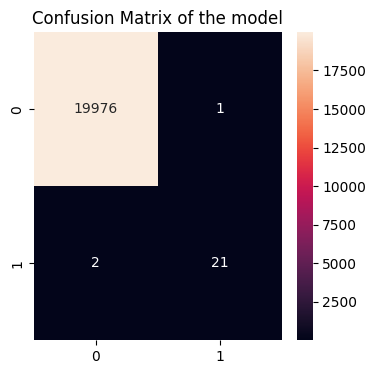

In [ ]:
# evaluation without prior feature selection
model = RandomForestClassifier()
model.fit (x_train, y_train)
prediction = model.predict(x_test)
RF = accuracy_score(y_test, prediction)
predec_prob = model.predict_proba(x_test)[:,1]

plot_ROC_curve(y_test, predec_prob)
evaluate_model()


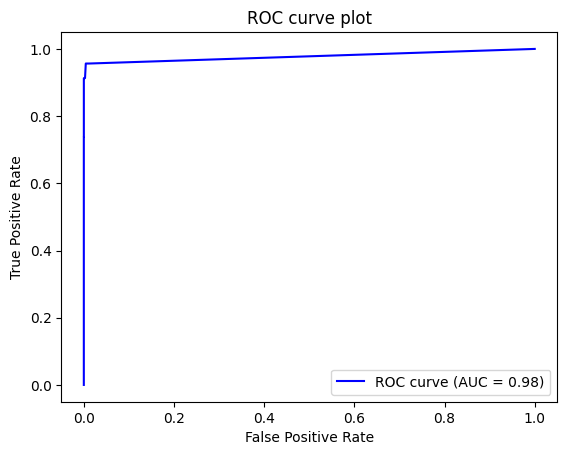

we have 99.98% accuracy
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19977
         1.0       0.95      0.83      0.88        23

    accuracy                           1.00     20000
   macro avg       0.97      0.91      0.94     20000
weighted avg       1.00      1.00      1.00     20000



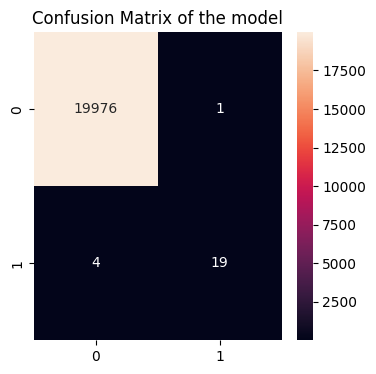

In [ ]:
# selectbest evaluation with rndom forest
model = RandomForestClassifier()
model.fit (x_train, y_train)
prediction = model.predict(x_test)
RF = accuracy_score(y_test, prediction)
predec_prob = model.predict_proba(x_test)[:,1]

plot_ROC_curve(y_test, predec_prob)
evaluate_model()

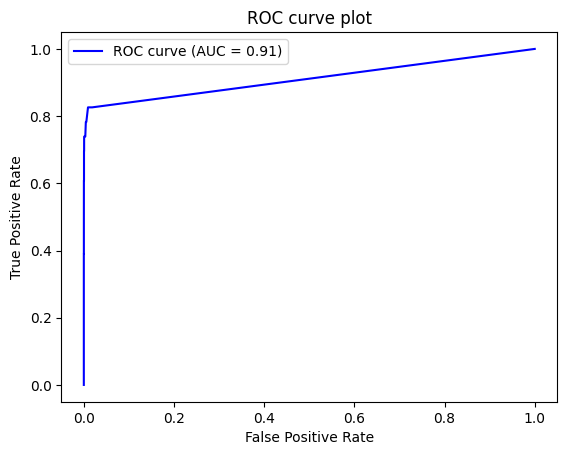

we have 99.92% accuracy
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19977
         1.0       1.00      0.35      0.52        23

    accuracy                           1.00     20000
   macro avg       1.00      0.67      0.76     20000
weighted avg       1.00      1.00      1.00     20000



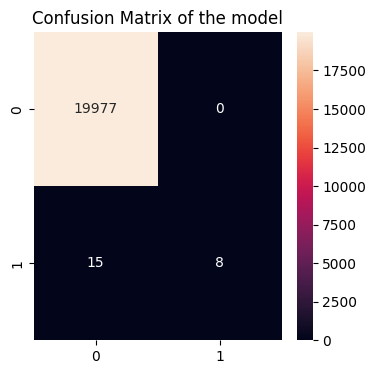

In [ ]:
# rfevd evaluation random forest
model = RandomForestClassifier()
model.fit (x_train, y_train)
prediction = model.predict(x_test)
RF = accuracy_score(y_test, prediction)
predec_prob = model.predict_proba(x_test)[:,1]
plot_ROC_curve(y_test, predec_prob)
evaluate_model()

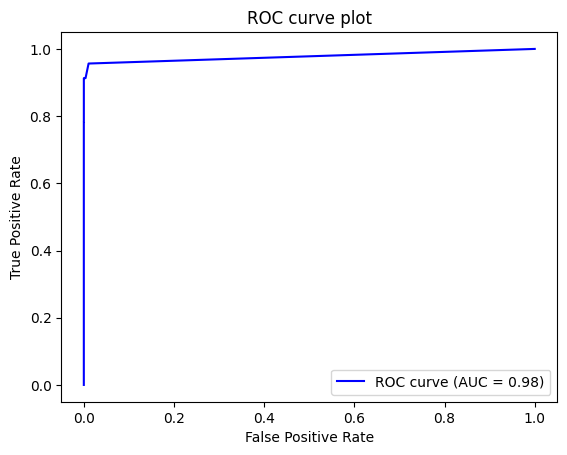

we have 99.98% accuracy
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19977
         1.0       0.95      0.87      0.91        23

    accuracy                           1.00     20000
   macro avg       0.98      0.93      0.95     20000
weighted avg       1.00      1.00      1.00     20000



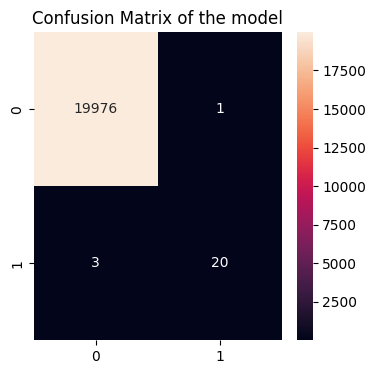

In [ ]:
# boruta evaluation wuth random forest
model = RandomForestClassifier()
model.fit (x_train, y_train)
prediction = model.predict(x_test)
RF = accuracy_score(y_test, prediction)
predec_prob = model.predict_proba(x_test)[:,1]

plot_ROC_curve(y_test, predec_prob)
evaluate_model()

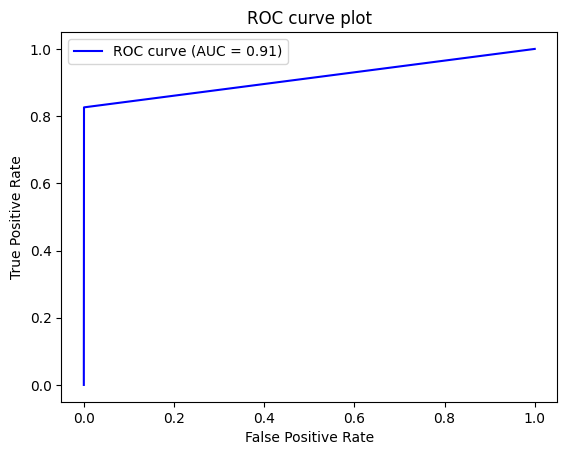

we have 99.94% accuracy
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19977
         1.0       0.70      0.83      0.76        23

    accuracy                           1.00     20000
   macro avg       0.85      0.91      0.88     20000
weighted avg       1.00      1.00      1.00     20000



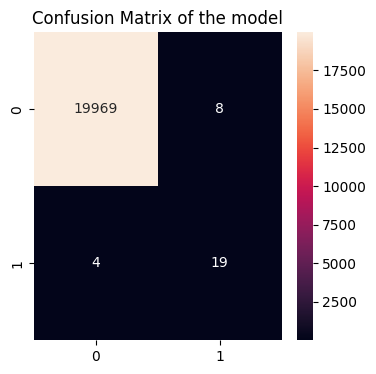

In [ ]:
# evaluation without prior feature selection
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)
prediction = model.predict(x_test)
DT = accuracy_score(y_test, prediction)
predec_prob = model.predict_proba(x_test)[:,1]
plot_ROC_curve(y_test, predec_prob)
evaluate_model()



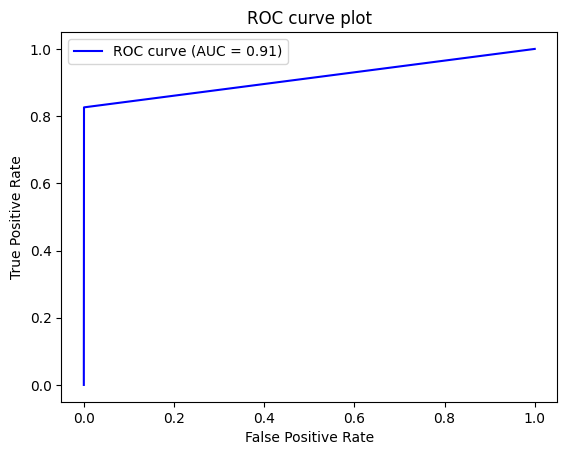

we have 99.94% accuracy
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19977
         1.0       0.70      0.83      0.76        23

    accuracy                           1.00     20000
   macro avg       0.85      0.91      0.88     20000
weighted avg       1.00      1.00      1.00     20000



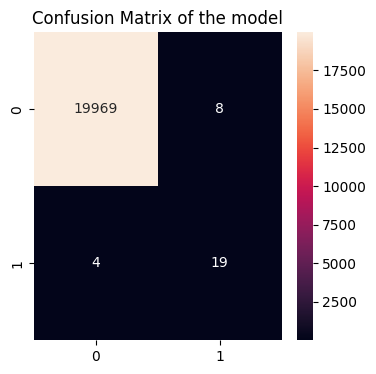

In [ ]:
# seelctkbest evaluation with dt
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)
prediction = model.predict(x_test)
DT = accuracy_score(y_test, prediction)
predec_prob = model.predict_proba(x_test)[:,1]
plot_ROC_curve(y_test, predec_prob)
evaluate_model()


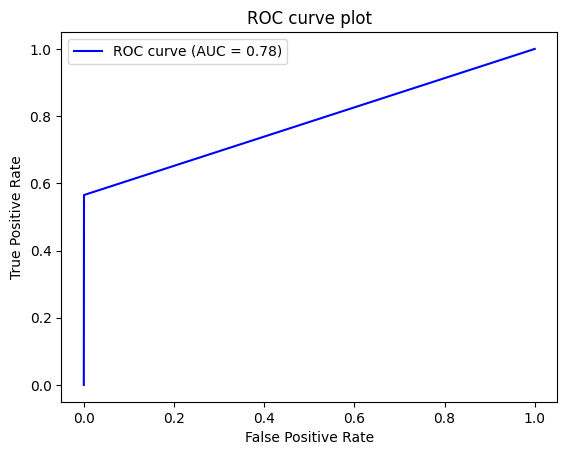

we have 99.91% accuracy
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19977
         1.0       0.62      0.57      0.59        23

    accuracy                           1.00     20000
   macro avg       0.81      0.78      0.80     20000
weighted avg       1.00      1.00      1.00     20000



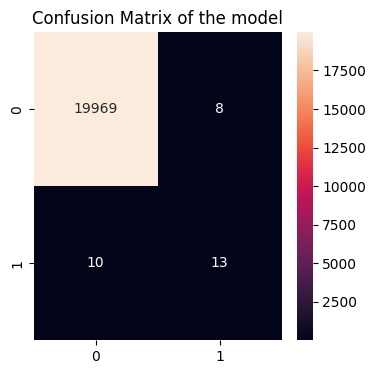

In [ ]:
# rfecv evaluation with dt
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)
prediction = model.predict(x_test)
DT = accuracy_score(y_test, prediction)
predec_prob = model.predict_proba(x_test)[:,1]
plot_ROC_curve(y_test, predec_prob)
evaluate_model()

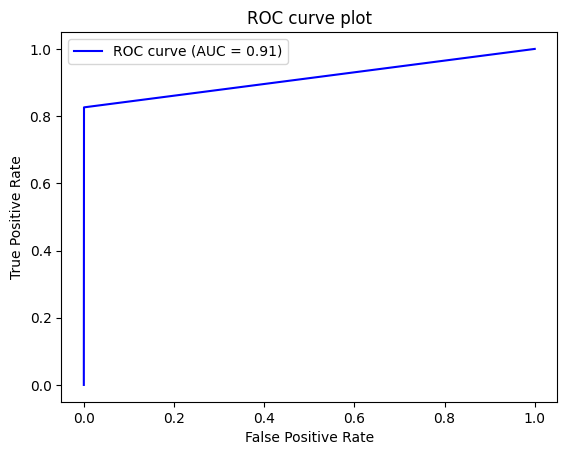

we have 99.94% accuracy
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19977
         1.0       0.70      0.83      0.76        23

    accuracy                           1.00     20000
   macro avg       0.85      0.91      0.88     20000
weighted avg       1.00      1.00      1.00     20000



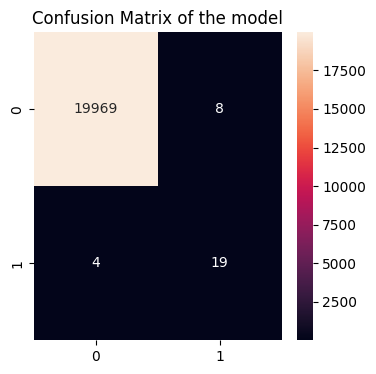

In [ ]:
# boruta evaluation with tree

from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)
prediction = model.predict(x_test)
DT = accuracy_score(y_test, prediction)
predec_prob = model.predict_proba(x_test)[:,1]
plot_ROC_curve(y_test, predec_prob)
evaluate_model()


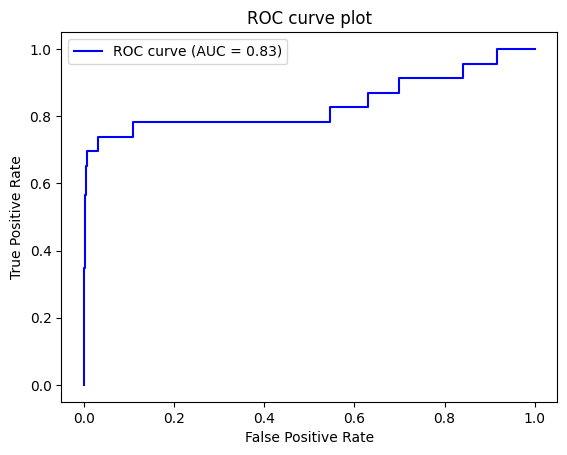

we have 99.89% accuracy
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19977
         1.0       0.00      0.00      0.00        23

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000



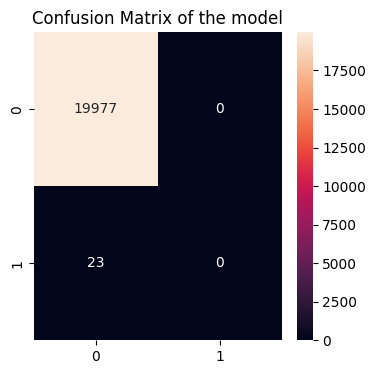

In [ ]:
# evaluation without prior feature selection
svm_model = SVC()
svm_model = model.fit(x_train,y_train)
y_pred_svm = svm_model.predict(x_test)
SVM = accuracy_score(y_test, y_pred_svm)

predec_prob_svm = svm_model.decision_function(x_test)
plot_ROC_curve(y_test, predec_prob_svm)
evaluate_model()



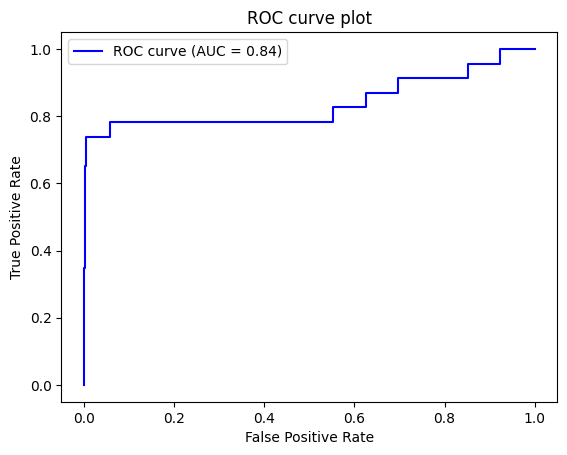

we have 99.89% accuracy
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19977
         1.0       0.00      0.00      0.00        23

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000



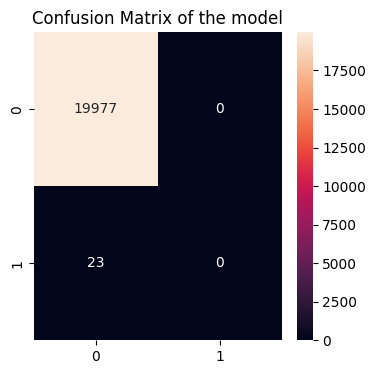

In [ ]:
# selectkbest evaluation for svc

model = SVC()
model.fit(x_train,y_train)
y_pred_svm = model.predict(x_test)
SVM = accuracy_score(y_test, y_pred_svm)

predec_prob_svm = model.decision_function(x_test)
plot_ROC_curve(y_test, predec_prob_svm)
# Evaluate SVM model
evaluate_model()

# Plot ROC curve for SVM


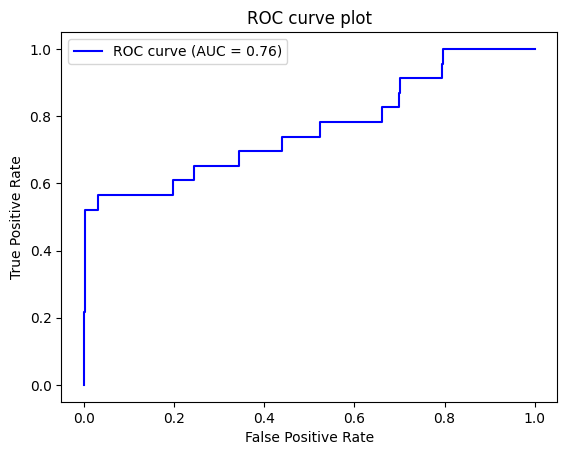

we have 99.89% accuracy
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19977
         1.0       0.00      0.00      0.00        23

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000



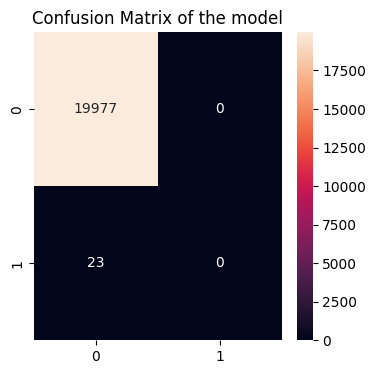

In [ ]:
# rfecv evaluation for svc

model = SVC()
model.fit(x_train,y_train)
y_pred_svm = model.predict(x_test)
SVM = accuracy_score(y_test, y_pred_svm)

predec_prob_svm = model.decision_function(x_test)
plot_ROC_curve(y_test, predec_prob_svm)
# Evaluate SVM model
evaluate_model()


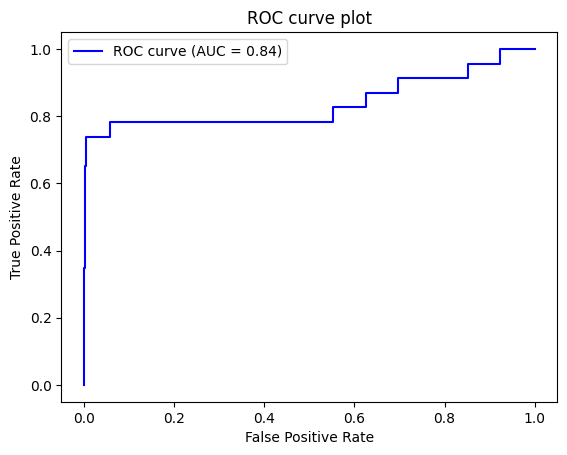

we have 99.89% accuracy
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19977
         1.0       0.00      0.00      0.00        23

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000



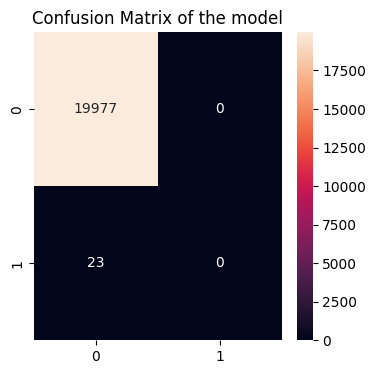

In [ ]:
# boruta evaluation for Svc
model = SVC()
model.fit(x_train,y_train)
y_pred_svm = model.predict(x_test)
SVM = accuracy_score(y_test, y_pred_svm)

predec_prob_svm = model.decision_function(x_test)
plot_ROC_curve(y_test, predec_prob_svm)
# Evaluate SVM model
evaluate_model()


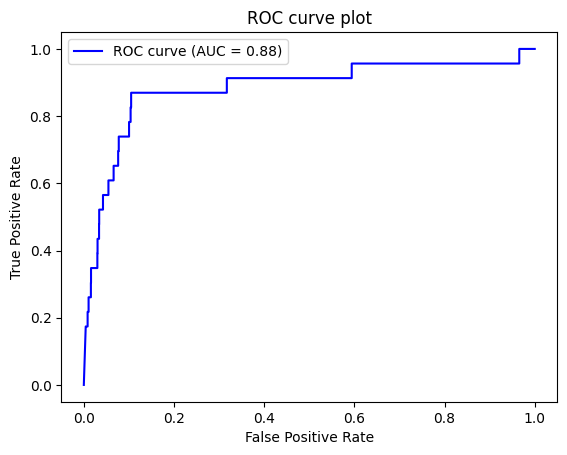

we have 97.17% accuracy
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     19977
         1.0       0.01      0.35      0.03        23

    accuracy                           0.97     20000
   macro avg       0.51      0.66      0.51     20000
weighted avg       1.00      0.97      0.98     20000



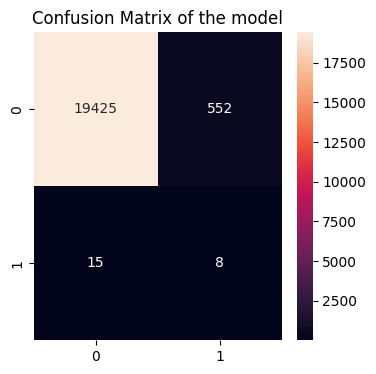

In [ ]:
# evaluation without prior feature selection
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
model = GaussianNB()
# fit the model
model.fit(x_train, y_train)
prediction = model.predict(x_test)
NB = accuracy_score(y_test, prediction)
predec_prob = model.predict_proba(x_test)[:,1]
plot_ROC_curve(y_test, predec_prob)
evaluate_model()



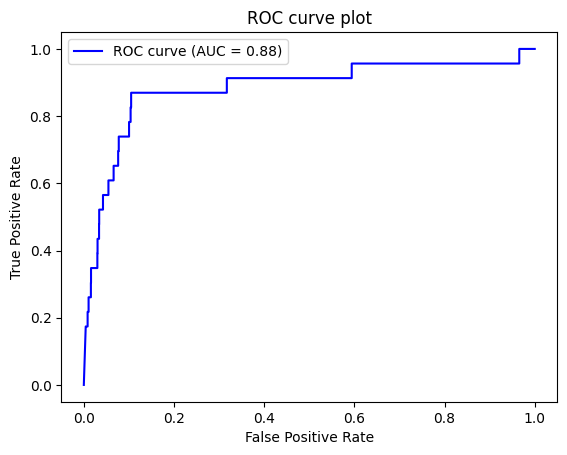

we have 97.17% accuracy
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     19977
         1.0       0.01      0.35      0.03        23

    accuracy                           0.97     20000
   macro avg       0.51      0.66      0.51     20000
weighted avg       1.00      0.97      0.98     20000



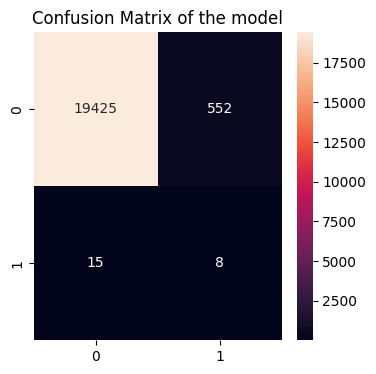

In [ ]:
# selectkbest evaluation for GaussianNB
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
model = GaussianNB()
# fit the model
model.fit(x_train, y_train)
prediction = model.predict(x_test)
NB = accuracy_score(y_test, prediction)
predec_prob = model.predict_proba(x_test)[:,1]
plot_ROC_curve(y_test, predec_prob)
evaluate_model()

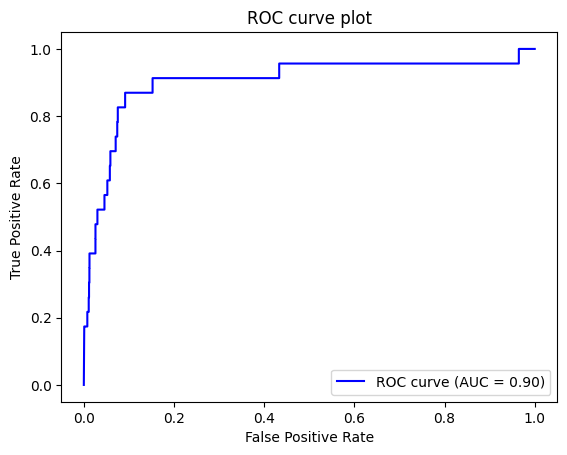

we have 97.12% accuracy
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     19977
         1.0       0.02      0.48      0.04        23

    accuracy                           0.97     20000
   macro avg       0.51      0.73      0.51     20000
weighted avg       1.00      0.97      0.98     20000



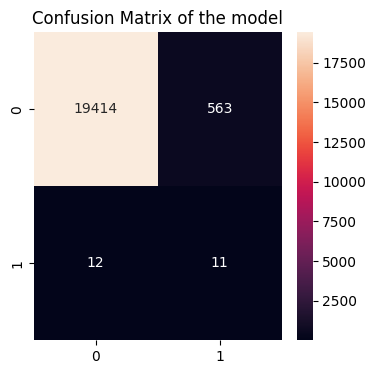

In [ ]:
# rfecv evaluation
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
model = GaussianNB()
# fit the model
model.fit(x_train, y_train)
prediction = model.predict(x_test)
NB = accuracy_score(y_test, prediction)
predec_prob = model.predict_proba(x_test)[:,1]
plot_ROC_curve(y_test, predec_prob)
evaluate_model()

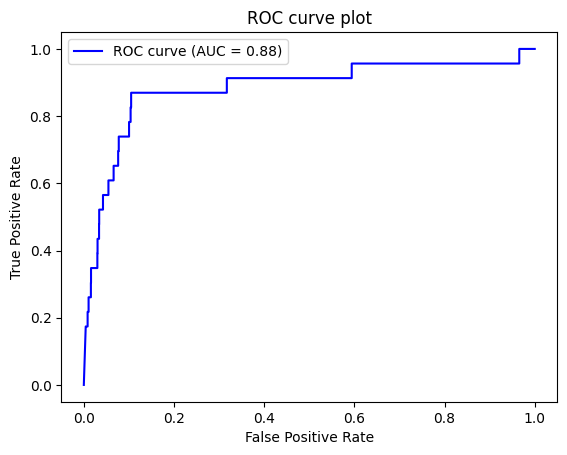

we have 97.17% accuracy
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     19977
         1.0       0.01      0.35      0.03        23

    accuracy                           0.97     20000
   macro avg       0.51      0.66      0.51     20000
weighted avg       1.00      0.97      0.98     20000



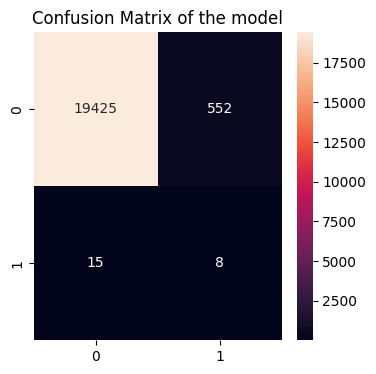

In [ ]:
# boruta evaluation
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
model = GaussianNB()
# fit the model
model.fit(x_train, y_train)
prediction = model.predict(x_test)
NB = accuracy_score(y_test, prediction)
predec_prob = model.predict_proba(x_test)[:,1]
plot_ROC_curve(y_test, predec_prob)
evaluate_model()

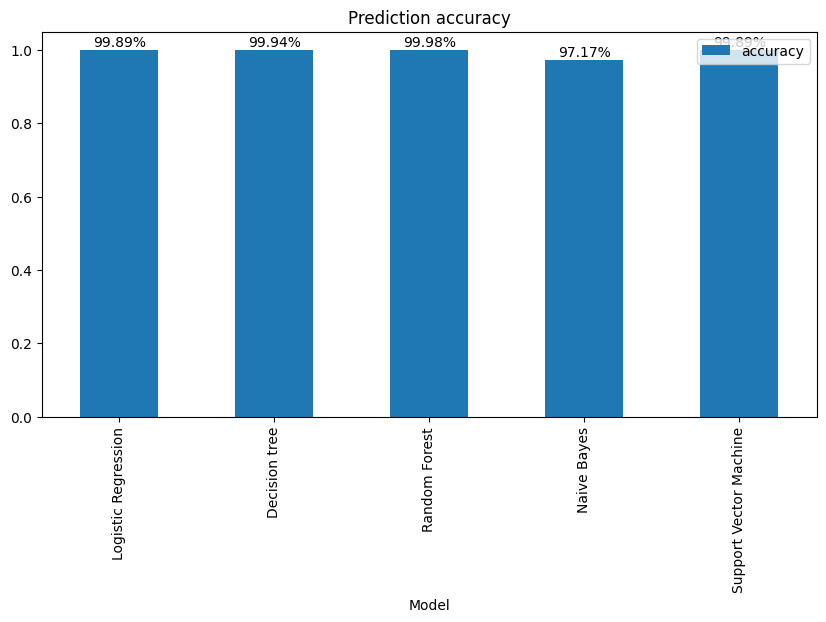

In [ ]:
# Result of model performance without prior feature selection
list = {"Model" : ["Logistic Regression", "Decision tree", "Random Forest", "Naive Bayes", "Support Vector Machine"],
        "accuracy" : [LR,DT,RF,NB,SVM] }
df2 = pd.DataFrame (data = list)

# Create the bar chart
ax = df2.plot(x="Model", y="accuracy", kind="bar", figsize=(10, 5), title="Prediction accuracy", sort_columns=True)

# Annotate bars with accuracy values as percentages
for i, value in enumerate(df2["accuracy"]):
    ax.text(i, value + 0.01, f"{value * 100:.2f}%", ha="center")

# Show the plot
plt.show()



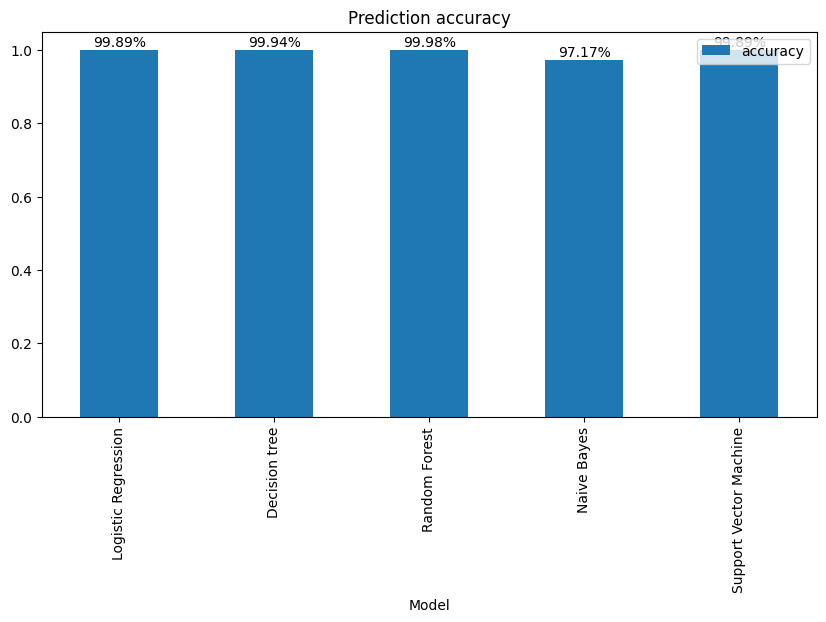

In [ ]:
# # Result of model performance selectkbest feature selection

list = {"Model" : ["Logistic Regression", "Decision tree", "Random Forest", "Naive Bayes", "Support Vector Machine"],
        "accuracy" : [LR,DT,RF,NB,SVM] }
df2 = pd.DataFrame (data = list)

# Create the bar chart
ax = df2.plot(x="Model", y="accuracy", kind="bar", figsize=(10, 5), title="Prediction accuracy", sort_columns=True)

# Annotate bars with accuracy values as percentages
for i, value in enumerate(df2["accuracy"]):
    ax.text(i, value + 0.01, f"{value * 100:.2f}%", ha="center")

# Show the plot
plt.show()


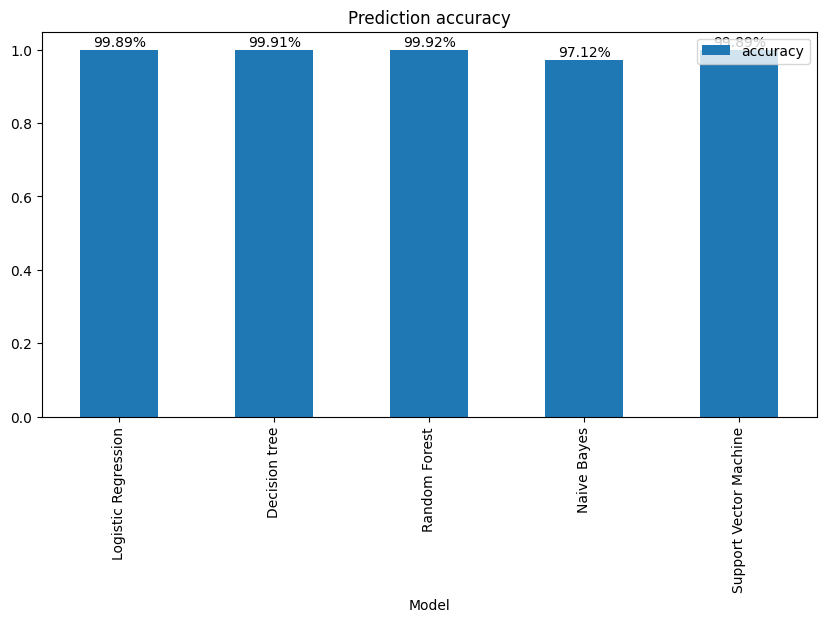

In [ ]:
# # Result of model performance rfe feature selection

list = {"Model" : ["Logistic Regression", "Decision tree", "Random Forest", "Naive Bayes", "Support Vector Machine"],
        "accuracy" : [LR,DT,RF,NB,SVM] }
df2 = pd.DataFrame (data = list)

# Create the bar chart
ax = df2.plot(x="Model", y="accuracy", kind="bar", figsize=(10, 5), title="Prediction accuracy", sort_columns=True)

# Annotate bars with accuracy values as percentages
for i, value in enumerate(df2["accuracy"]):
    ax.text(i, value + 0.01, f"{value * 100:.2f}%", ha="center")

# Show the plot
plt.show()


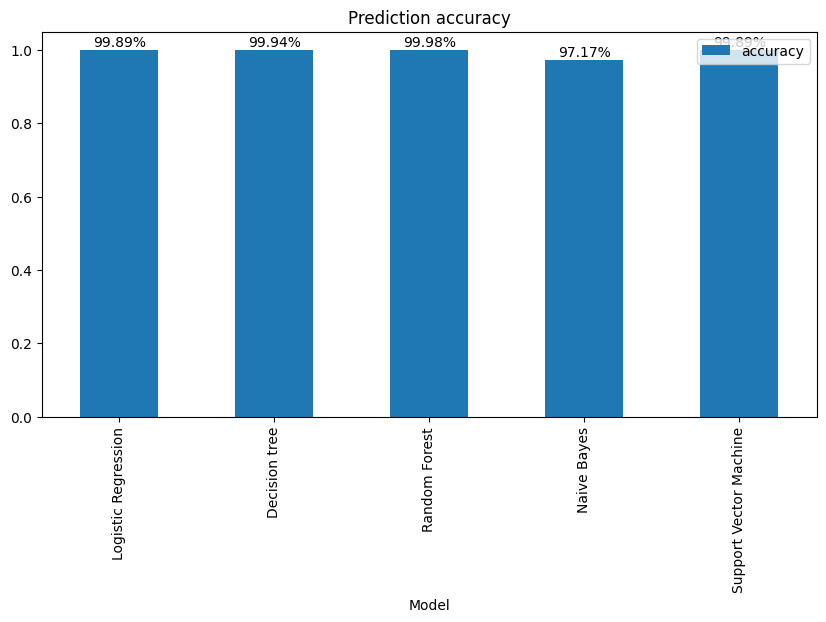

In [ ]:
# # Result of model performance boruta feature selection

list = {"Model" : ["Logistic Regression", "Decision tree", "Random Forest", "Naive Bayes", "Support Vector Machine"],
        "accuracy" : [LR,DT,RF,NB,SVM] }
df2 = pd.DataFrame (data = list)

# Create the bar chart
ax = df2.plot(x="Model", y="accuracy", kind="bar", figsize=(10, 5), title="Prediction accuracy", sort_columns=True)

# Annotate bars with accuracy values as percentages
for i, value in enumerate(df2["accuracy"]):
    ax.text(i, value + 0.01, f"{value * 100:.2f}%", ha="center")

# Show the plot
plt.show()


In [ ]:
# def print_results(results):
#     print('BEST PARAMS: {}\n'.format(results.best_params_))

#     means = results.cv_results_['mean_test_score']
#     stds = results.cv_results_['std_test_score']

#     for mean, std, params in zip(means, stds, results.cv_results_['params']):
#         print('{} (+/-{}) for {}'.format(round(mean, 7), round(std * 2, 4), params))

In [ ]:
# Data Sampling

In [ ]:
from imblearn.over_sampling import SMOTE
#from imblearn.combine import SMOTEENN
from sklearn.datasets import make_classification

smote = SMOTE(random_state = 2)
Xtrain_resampled, ytrain_resampled = smote.fit_resample(x_train,y_train)

In [ ]:
ytrain_resampled.value_counts()

isFraud
0.00000    79909
1.00000    79909
dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, mean_squared_error, mean_absolute_error

def evaluate_model():
    prediction = model.predict(x_test)
    acc_score = accuracy_score(y_test, prediction)
    print('we have {:.2f}% accuracy'.format(acc_score * 100))
    # Plot predicted vs actual
    plt.figure(figsize=(4, 4))
    print(classification_report(y_test,prediction))
    plt.title('Confusion Matrix of the model')
    sns.heatmap(confusion_matrix(y_test,prediction), annot=True, fmt='.5g');

def plot_ROC_curve(y_test, prob):
    # Takes actual and predicted probabilities as input and plots the ROC curve
    fpr, tpr, threshold = roc_curve(y_test, prob)
    auc_value = roc_auc_score(y_test, prob)  # Calculate AUC value

    plt.title("ROC curve plot")
    plt.plot(fpr, tpr, 'b', label="ROC curve (AUC = {:.2f})".format(auc_value))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

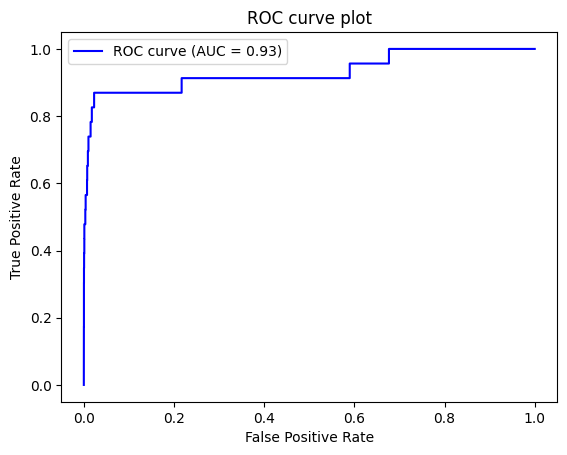

we have 95.17% accuracy
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98     19977
         1.0       0.02      0.87      0.04        23

    accuracy                           0.95     20000
   macro avg       0.51      0.91      0.51     20000
weighted avg       1.00      0.95      0.97     20000



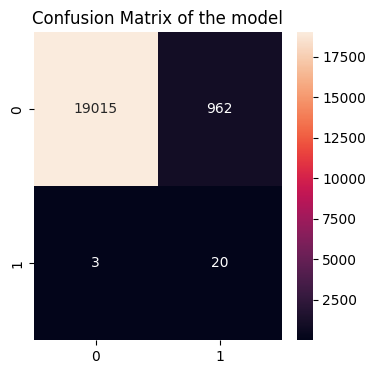

In [ ]:

model = LogisticRegression(random_state=42)
model.fit(Xtrain_resampled, np.ravel(ytrain_resampled))

# predections = model.predict(x_test)
predec_prob = model.predict_proba(x_test)[:,1]
prediction = model.predict(x_test)
LR = accuracy_score(y_test, prediction)
plot_ROC_curve(y_test, predec_prob)
evaluate_model()

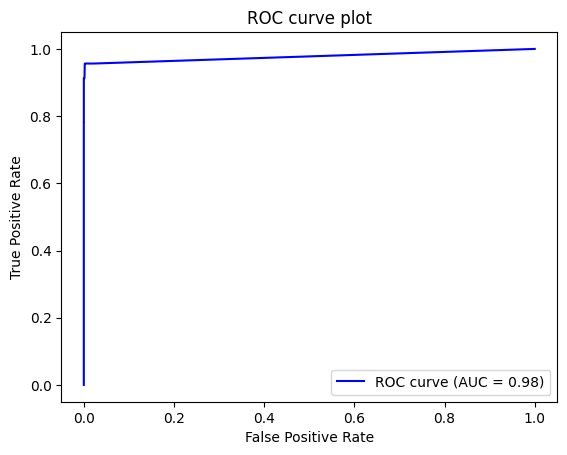

we have 99.98% accuracy
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19977
         1.0       0.95      0.87      0.91        23

    accuracy                           1.00     20000
   macro avg       0.98      0.93      0.95     20000
weighted avg       1.00      1.00      1.00     20000



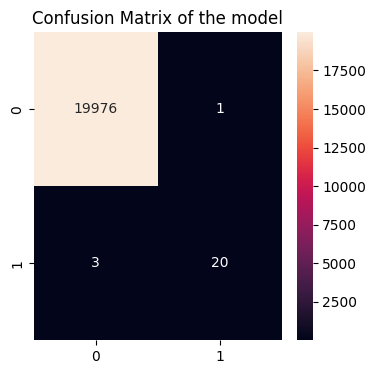

In [ ]:


model = RandomForestClassifier()
#  (n_estimators = 15, n_jobs = -1, random_state = 10)
model.fit(Xtrain_resampled,ytrain_resampled)
y_pred=model.predict(x_test)
prediction = model.predict(x_test)
RF = accuracy_score(y_test, prediction)
predec_prob = model.predict_proba(x_test)[:,1]
# model_evaluation(y_test, y_pred)

plot_ROC_curve(y_test, predec_prob)
evaluate_model()




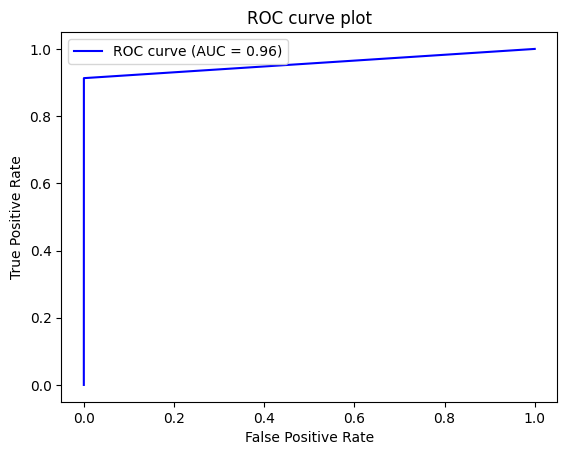

we have 99.98% accuracy
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19977
         1.0       0.88      0.91      0.89        23

    accuracy                           1.00     20000
   macro avg       0.94      0.96      0.95     20000
weighted avg       1.00      1.00      1.00     20000



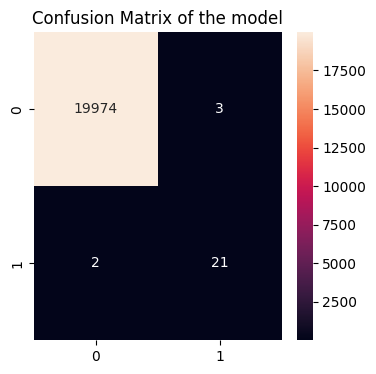

In [ ]:


from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=42)
model.fit(Xtrain_resampled,ytrain_resampled)
y_pred1 = model.predict (x_test)
prediction = model.predict(x_test)
DT = accuracy_score(y_test, prediction)
predec_prob = model.predict_proba(x_test)[:,1]
# model_evaluation(y_test, y_pred1)
plot_ROC_curve(y_test, predec_prob)
evaluate_model()


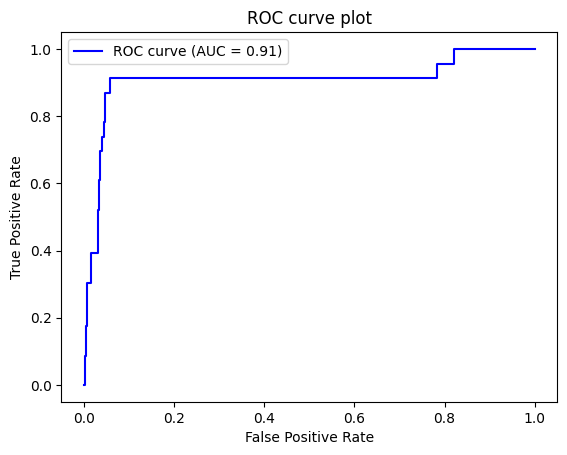

we have 91.38% accuracy
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95     19977
         1.0       0.01      0.91      0.02        23

    accuracy                           0.91     20000
   macro avg       0.51      0.91      0.49     20000
weighted avg       1.00      0.91      0.95     20000



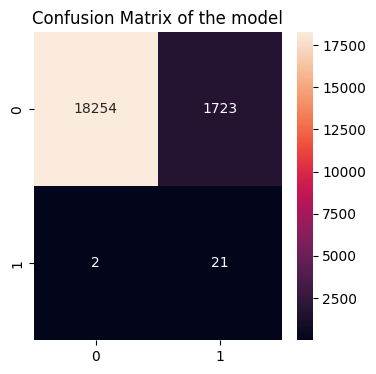

In [ ]:

model = SVC()
model.fit(Xtrain_resampled,ytrain_resampled)
y_pred_svm = model.predict(x_test)
SVM = accuracy_score(y_test, y_pred_svm)

predec_prob_svm = model.decision_function(x_test)
plot_ROC_curve(y_test, predec_prob_svm)
# Evaluate SVM model
evaluate_model()

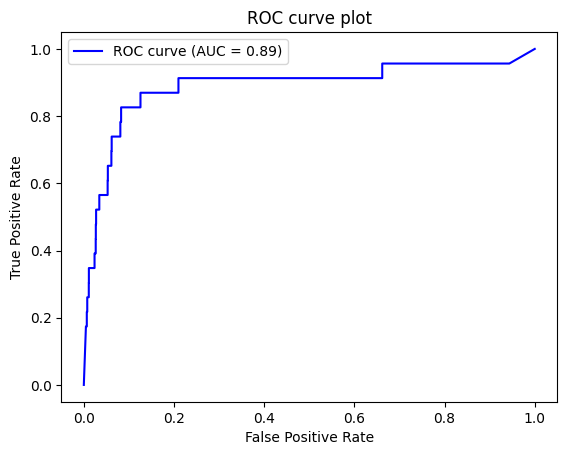

we have 40.59% accuracy
              precision    recall  f1-score   support

         0.0       1.00      0.41      0.58     19977
         1.0       0.00      0.91      0.00        23

    accuracy                           0.41     20000
   macro avg       0.50      0.66      0.29     20000
weighted avg       1.00      0.41      0.58     20000



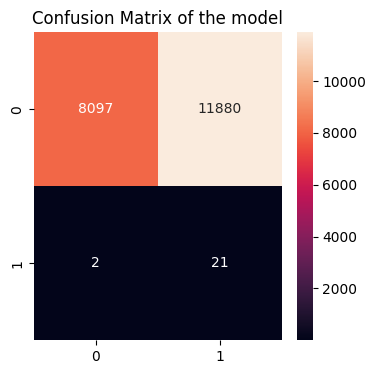

In [ ]:


# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
model = GaussianNB()
# fit the model
model.fit(Xtrain_resampled,ytrain_resampled)
# y_pred = model.predict(x_test)
prediction = model.predict(x_test)
NB = accuracy_score(y_test, prediction)
predec_prob = model.predict_proba(x_test)[:,1]
# model_evaluation(y_test, y_pred)
plot_ROC_curve(y_test, predec_prob)
evaluate_model()

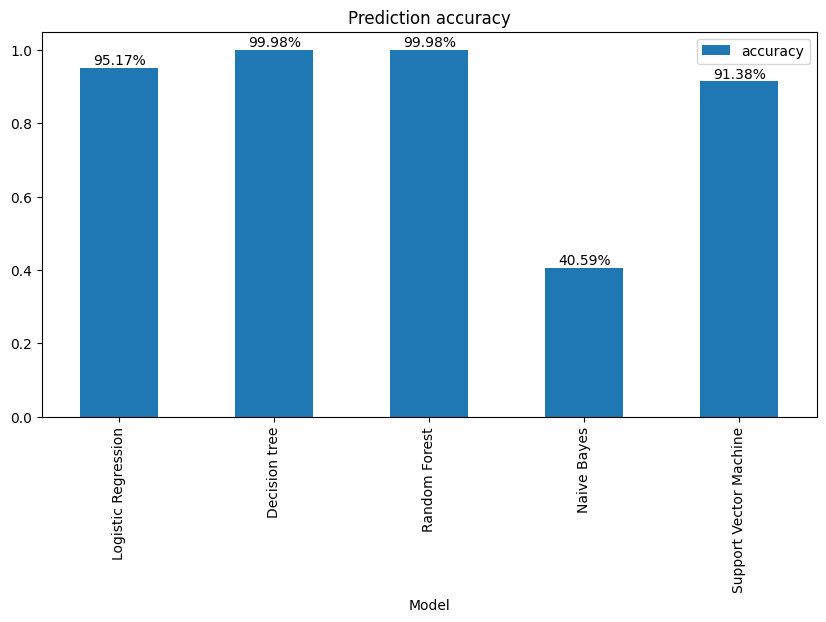

In [ ]:
list = {"Model" : ["Logistic Regression", "Decision tree", "Random Forest", "Naive Bayes", "Support Vector Machine"],
        "accuracy" : [LR,DT,RF,NB,SVM] }
df2 = pd.DataFrame (data = list)

# Create the bar chart
ax = df2.plot(x="Model", y="accuracy", kind="bar", figsize=(10, 5), title="Prediction accuracy", sort_columns=True)

# Annotate bars with accuracy values as percentages
for i, value in enumerate(df2["accuracy"]):
    ax.text(i, value + 0.01, f"{value * 100:.2f}%", ha="center")

# Show the plot
plt.show()